In [1]:
!pip install matplotlib --upgrade
!pip install geopandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 11.2 MB 5.6 MB/s 
     |████████████████████████████████| 957 kB 54.2 MB/s 
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.2.2
    Uninstalling matplotlib-3.2.2:
      Successfully uninstalled matplotlib-3.2.2


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.0 MB 5.2 MB/s 
     |████████████████████████████████| 16.7 MB 130 kB/s 
     |████████████████████████████████| 6.3 MB 40.7 MB/s 


In [1]:
import requests, pandas as pd, numpy as np, seaborn as sns, matplotlib.pyplot as plt, geopandas as gpd, pickle
from numpy import sqrt

pd.set_option('display.max_columns', None)
pd.options.display.float_format = '{:,.2f}'.format

# ***Aggregate and Calculate Proportions***

Explore Hispanic racial identity. Hispanics self-identify as a variety of races. We will use the **`sum()`** method to help calculate national percentages of Hispanics identifying as each race.

Census workers are often promulgating information to the public, who are used to seeing proportions as percentages. For this reason, we will use percentages in this exercise and throughout this course.

`pandas` has been imported as `pd`. State-level counts from table "P5 - Hispanic or Latino Origin by Race" have been loaded into the DataFrame `states`.

* Calculate the percentage of Hispanics who identify as White. Use `100` times the sum of values in the `hispanic_white` column divided by the sum of values in the hispanic column.

* Create a list `hispanic_races` with the names of columns that count Hispanics by race.

* Calculate percentages using `100` times the sum of *each* race column (Use the list!) divided by the sum of the `hispanic` column.

In [ ]:
states = pd.read_csv('states.csv').set_index('Unnamed: 0')
states.index.rename('', inplace=True)

display(states.head())

# What percentage of Hispanics identify as White?
print(100 * states['hispanic_white'].sum() / states['hispanic'].sum(), "\n")

# Set list of Hispanic race column names
hispanic_races = ["hispanic_white",  "hispanic_black", "hispanic_aian", 
                  "hispanic_asian", "hispanic_pacific",  "hispanic_other", 
                  "hispanic_multiracial"]

# What percentage of Hispanics identify as each race?
print(100 * states[hispanic_races].sum() / states['hispanic'].sum())

,total,nonhispanic,white,black,aian,asian,pacific,other,multiracial,hispanic,hispanic_white,hispanic_black,hispanic_aian,hispanic_asian,hispanic_pacific,hispanic_other,hispanic_multiracial
,,,,,,,,,,,,,,,,,
Alabama,4779736,4594134,3204402,1244437,25907,52937,1976,4030,60445,185602,70992,6874,2311,658,1081,92880,10806
Alaska,710231,670982,455320,21949,102556,37459,7219,1111,45368,39249,18256,1314,2315,676,190,9991,6507
Arizona,6392017,4496868,3695647,239101,257426,170509,10959,8595,114631,1895149,971474,19907,39103,6186,1689,753121,103669
Arkansas,2915918,2729868,2173469,447102,20183,35647,5509,2121,45837,186050,71760,2793,2065,455,354,97450,11173
California,37253956,23240237,14956253,2163804,162250,4775070,128577,85587,968696,14013719,6497681,135268,200551,85937,15809,6231785,846688


54.5246839030109 

hispanic_white         54.52
hispanic_black          3.14
hispanic_aian           1.30
hispanic_asian          0.39
hispanic_pacific        0.11
hispanic_other         34.69
hispanic_multiracial    5.84
dtype: float64


# ***Calculate Proportions***

Nationally, 55% of Hispanics identify as White and 35% identify as "Some Other Race".  But there is substantial state-to-state variation, which we will now investigate. As a reminder, we will express proportions as percentages throughout this course.

`pandas` has been imported, the DataFrame `states` is loaded with population counts by race and Hispanic origin. A list, `hispanic_races`, has names of columns with Hispanics by race data, and is shown in the console.

* Use the copy method to create a deep copy of only the `hispanic_races` columns in `states`.

* As you iterate the races in the `hispanic_races` list, calculate the percentage of Hispanics identifying as each race as `100` times the count of the current race divided by the total number of Hispanics.

* Print the `head` of the resulting DataFrame.

In [ ]:
# What percentage of Hispanics identify as each race?
print(100 * states[hispanic_races].sum() / states["hispanic"].sum())

# Create a deep copy of only the Hispanic race columns
states_hr = states[hispanic_races].copy()

# Calculate percentages for all columns in the date frame
for race in hispanic_races:
    states_hr[race] = 100 * states_hr[race] / states["hispanic"]

# View the result
states_hr.head()


hispanic_white         54.52
hispanic_black          3.14
hispanic_aian           1.30
hispanic_asian          0.39
hispanic_pacific        0.11
hispanic_other         34.69
hispanic_multiracial    5.84
dtype: float64


,hispanic_white,hispanic_black,hispanic_aian,hispanic_asian,hispanic_pacific,hispanic_other,hispanic_multiracial
,,,,,,,
Alabama,38.25,3.70,1.25,0.35,0.58,50.04,5.82
Alaska,46.51,3.35,5.90,1.72,0.48,25.46,16.58
Arizona,51.26,1.05,2.06,0.33,0.09,39.74,5.47
Arkansas,38.57,1.50,1.11,0.24,0.19,52.38,6.01
California,46.37,0.97,1.43,0.61,0.11,44.47,6.04


# ***Identify Extreme Values***

Now that you have created a DataFrame with the percentage of Hispanic racial self-identification by state, you will explore it further, beginning by creating a `boxplot` using `seaborn`.

You will also find the states with the largest or smallest percentage of Hispanics identifying as particular races. To do so, you will apply the **`squeeze()`** method. This method ***converts a single-row DataFrame to a series*** (with no effect on a DataFrame with more than one row).

`pandas` has been imported. The DataFrame `states_hr` is loaded, which has percentages of racial self-identification for 7 different race categories.

* Create a `boxplot` by setting the **`data`** parameter to the name of the DataFrame. (**`orient="h"`** will plot the boxplots horizontally.)

* Using **`squeeze`**, show the state with the largest value in column `hispanic_white`.

* Using **`squeeze`**, show the state with the smallest value in column `hispanic_other`.

* Notice that very few Hispanics identify as Asian, but one state is a high outlier. Using **`squeeze`**, show the state with the largest value in column `hispanic_asian`.

In [ ]:
help(states_hr.nlargest)

Help on method nlargest in module pandas.core.frame:

nlargest(n, columns, keep: 'str' = 'first') -> 'DataFrame' method of pandas.core.frame.DataFrame instance
    Return the first `n` rows ordered by `columns` in descending order.
    
    Return the first `n` rows with the largest values in `columns`, in
    descending order. The columns that are not specified are returned as
    well, but not used for ordering.
    
    This method is equivalent to
    ``df.sort_values(columns, ascending=False).head(n)``, but more
    performant.
    
    Parameters
    ----------
    n : int
        Number of rows to return.
    columns : label or list of labels
        Column label(s) to order by.
    keep : {'first', 'last', 'all'}, default 'first'
        Where there are duplicate values:
    
        - `first` : prioritize the first occurrence(s)
        - `last` : prioritize the last occurrence(s)
        - ``all`` : do not drop any duplicates, even it means
                    selecting more 

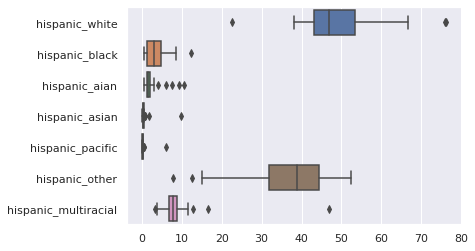

hispanic_white         76.34
hispanic_black          3.52
hispanic_aian           0.57
hispanic_asian          0.23
hispanic_pacific        0.06
hispanic_other         14.98
hispanic_multiracial    4.30
Name: Florida, dtype: float64 

hispanic_white         75.86
hispanic_black         12.39
hispanic_aian           0.53
hispanic_asian          0.11
hispanic_pacific        0.01
hispanic_other          7.83
hispanic_multiracial    3.28
Name: Puerto Rico, dtype: float64 

hispanic_white         22.56
hispanic_black          1.26
hispanic_aian           1.11
hispanic_asian          9.75
hispanic_pacific        5.96
hispanic_other         12.49
hispanic_multiracial   46.87
Name: Hawaii, dtype: float64 



In [ ]:
# Create a boxplot
sns.boxplot(data=states_hr, orient="h")
plt.show()

# Show states with extreme values in various columns
print(states_hr.nlargest(1, columns='hispanic_white').squeeze(), '\n')
print(states_hr.nsmallest(1, columns='hispanic_other').squeeze(), '\n')
print(states_hr.nlargest(1, columns='hispanic_asian').squeeze(), '\n')

Note that Hawaii is also (unsurprisingly) the state the largest percentage of Hispanics identifying as Pacific Islander.

# **Structure of a Census API Request**

[https://api.census.gov/data/2010/dec/sf1?get=NAME,P001001,&for=state:*](https://api.census.gov/data/2010/dec/sf1?get=NAME,P001001,&for=state:*)

* Base URL 

  * [https://api.census.gov/data/2010/dec/sf1?](https://api.census.gov/data/2010/dec/sf1?)
     * Host = `https://api.census.gov/data`
     * Year = `2010`
     * Dataset = `dec/sf1` (**S**ummary **F**ile 1, **Dec**ennial census)
* Parameters
   * `get=NAME,P001001,&for=state:*`  (`:*` หมายถึง all states)
     * `get` - List of variables
     * `for` - Geography of interest

# **The requests Library**

ทำการสร้าง API's URL ขึ้นมา


In [ ]:
import requests

HOST = "https://api.census.gov/data"
year = "2010"
dataset = "dec/sf1"
base_url = "/".join([HOST, year, dataset])

# requests.get() ใช้ dict เป็นตัวแปร

predicates = {}
get_vars = ["NAME", "AREALAND", "P001001"]
predicates["get"] = ",".join(get_vars)
predicates["for"] = "state:*"

r = requests.get(base_url, params=predicates)

In [ ]:
r.text

"error: error: unknown variable 'AREALAND'"

ควรจะเป็นอย่างนี้



```
[["NAME","AREALAND","P001001","state"],
["Alabama","131170787086","4779736","01"],
["Alaska","1477953211577","710231","02"],
["Arizona","294207314414","6392017","04"],
...
```



# ***The Basic API Request***

In this exercise, you will construct an API request to retrieve the average family size and median age for all states in the United States. The data will come from Summary File 1 of the 2010 Decennial Census.

`requests` has been imported for you.

* Specify appropriate string values for year and dataset to retrieve data for 2010 from Summary File 1 of the Decennial Census

* Construct `get_vars`, the list of Census variables to request, with the following variable names: 
   * `"NAME"`, 
   * `"P013001"` (median age), 
   * `"P037001"` (average family size),

* Output `r.text` using the `print` function

In [ ]:
# Build base URL
HOST = "https://api.census.gov/data"
year = '2010'
dataset = 'dec/sf1'
base_url = "/".join([HOST, year, dataset])

# Specify Census variables and other predicates
get_vars = ["NAME", "P013001", "P037001"]
predicates = {}
predicates["get"] = ",".join(get_vars)
predicates["for"] = "state:*"

# Execute the request, examine text of response object
r = requests.get(base_url, params=predicates)
print(r.text)

[["NAME","P013001","P037001","state"],
["Alabama","37.9","3.02","01"],
["Alaska","33.8","3.21","02"],
["Arizona","35.9","3.19","04"],
["Arkansas","37.4","3.00","05"],
["California","35.2","3.45","06"],
["Louisiana","35.8","3.10","22"],
["Kentucky","38.1","2.98","21"],
["Colorado","36.1","3.08","08"],
["Connecticut","40.0","3.08","09"],
["Delaware","38.8","3.06","10"],
["District of Columbia","33.8","3.01","11"],
["Florida","40.7","3.01","12"],
["Georgia","35.3","3.17","13"],
["Hawaii","38.6","3.42","15"],
["Idaho","34.6","3.16","16"],
["Illinois","36.6","3.20","17"],
["Indiana","37.0","3.05","18"],
["Iowa","38.1","2.97","19"],
["Kansas","36.0","3.06","20"],
["Maine","42.7","2.83","23"],
["Maryland","38.0","3.15","24"],
["Massachusetts","39.1","3.08","25"],
["Michigan","38.9","3.05","26"],
["Minnesota","37.4","3.05","27"],
["Mississippi","36.0","3.11","28"],
["Missouri","37.9","3.00","29"],
["Montana","39.8","2.91","30"],
["Nebraska","36.2","3.04","31"],
["Nevada","36.3","3.20","32"],
[

One important note: executing actual API requests could provide a poor learning experience if there are connection problems or if you accidentally perform a very large request. Instead, in this course you'll be writing code that looks exactly like the code you'd write locally, but that in the background it mimicks a request and returns the corresponding response object (if you set up the code right). If you're curious about how this works, check out this [GitHub repo](https://github.com/adrian-datacamp/mock-request).

# ***The API Response and Pandas***

Load data from an API response object into a `pandas` DataFrame. You will assign user-friendly column names and convert the values from strings to appropriate data types.

After creating the DataFrame, run the sample code to create a scatterplot to visualize the relationship between average family size and median age in the United States.

`requests` and `pandas` (as `pd`) have already been imported. A response object `r` is loaded.

* Build a list `col_names` of 4 new column names: 
   * `name`, 
   * `median_age`, 
   * `avg_family_size`, and 
   * `state`

* Use the DataFrame constructor to create the DataFrame `states`. The data parameter should be set to `r.json()`, but use slicing to skip the first item, which contains the old column names

* Use the **`astype`** method on each column to assign the correct data type.

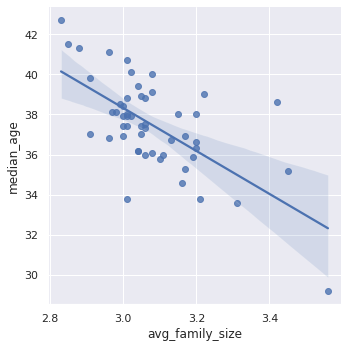

In [ ]:
# Construct the DataFrame
col_names = ['name', 'median_age', 'avg_family_size', 'state']
states = pd.DataFrame(columns=col_names, data=r.json()[1:])

# Convert each column with numeric data to an appropriate type
states["median_age"] = states["median_age"].astype(float)
states["avg_family_size"] = states["avg_family_size"].astype(float)

# Scatterplot with regression line
sns.lmplot(x="avg_family_size", y="median_age", data=states)
plt.show()

Notice that larger average family size means more children per adult, and is correlated with lower median age.

# ***API to Visualization: Group Quarters***

Investigate where juvenile offenders are incarcerated. This exercise introduces the concept of "group quarters" populations, which includes college dorms, correctional facilities, nursing homes, military bases, etc.

You will visualize the percentage, by state, of incarcerated `minor` males in `adult` correctional facilities. The variables to request are:

* `PCT021005` - Male: Under 18 years: Institutionalized population: Correctional facilities for adults
* `PCT021015` - Male: Under 18 years: Institutionalized population: Juvenile facilities: Correctional facilities intended for juveniles

`requests` has been imported. The `base_url` for the API request has been defined.

`pandas` and `seaborn` have been imported using the usual aliases.

* Complete the list `get_vars` with the two desired variables

* Use `astype` to convert the columns `in_adult` and `in_juvenile` to integer

* Calculate the percentage of minors in correctional facilities for adults: the numerator should be 100 times the number of minors `in_adult` correctional facilities; the denominator should be the sum of minors `in_adult` and `in_juvenile` correctional facilities

* Sort `states` by `pct_in_adult` in descending order, using `inplace=True`

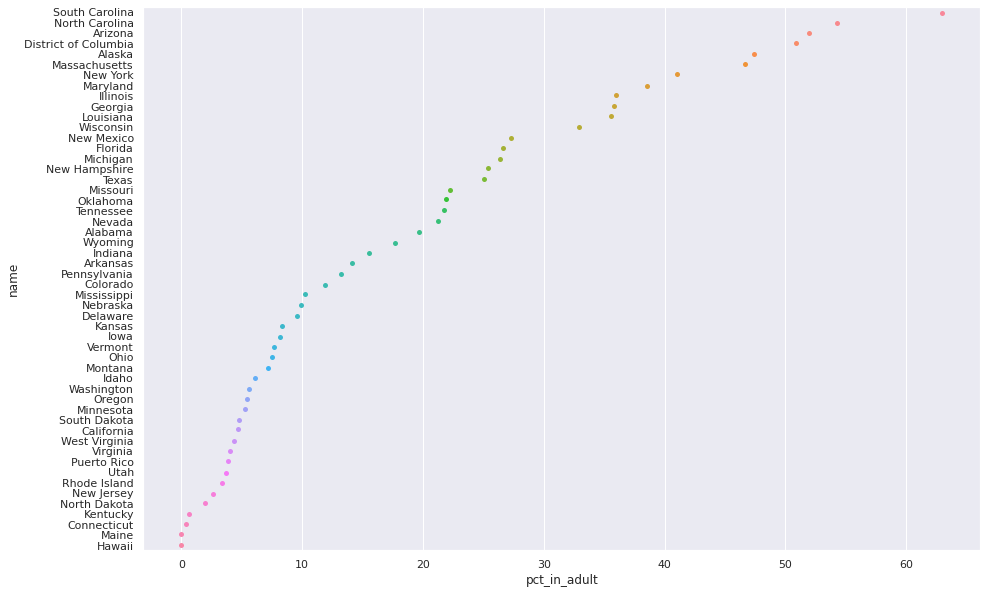

In [ ]:
fig, ax = plt.subplots(figsize=(15, 10))
predicates = {}
predicates["get"] = ",".join(get_vars)
predicates["for"] = "state:*"
base_url = 'https://api.census.gov/data/2010/dec/sf1'

# Specify variables and execute API request
get_vars = ["NAME", "PCT021005", "PCT021015"]
predicates["get"] = ",".join(get_vars)
r = requests.get(base_url, params=predicates)

# Construct DataFrame
col_names = ["name", "in_adult", "in_juvenile", "state"]
states = pd.DataFrame(columns=col_names, data=r.json()[1:])
states[["in_adult", "in_juvenile"]] = states[["in_adult", "in_juvenile"]].astype(int)

# Calculate percentage of incarcerated male minors in adult facilities
states["pct_in_adult"] = 100 * states['in_adult']/(states['in_adult'] + states['in_juvenile'])
states.sort_values(by='pct_in_adult', ascending=False, inplace=True)
sns.stripplot(x="pct_in_adult", y="name", data=states, ax=ax)
plt.show()

Notice that Southern states top the chart, while some states are at or near 0%.

# ***Request Specific Geographies***

รหัสของรัฐหาได้จากเว็บ [Geographic Codes Lookup/ Missouri Data Center](https://mcdc.missouri.edu/applications/geocodes/?state=00)

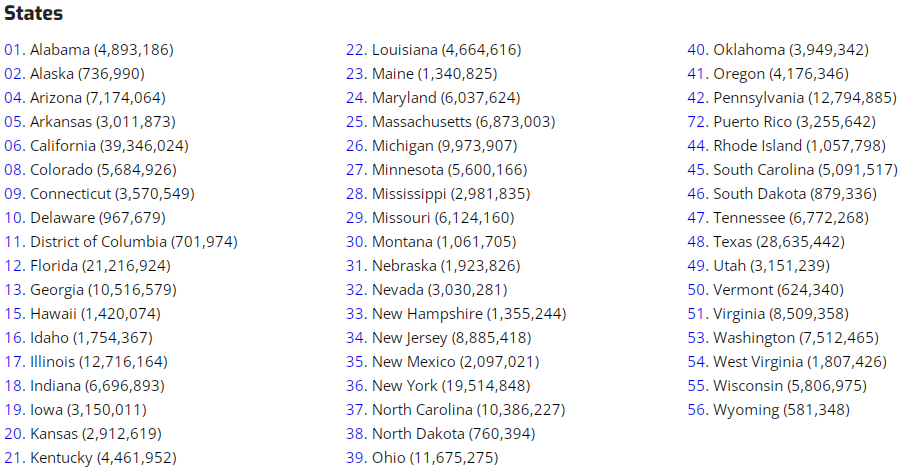

In [ ]:
import requests 

HOST = "https://api.census.gov/data"
year = "2010"
dataset = "dec/sf1"
base_url = "/".join([HOST, year, dataset]) 
predicates = {} 
predicates["get"] = "NAME,P001001"
predicates["for"] = "state:42" # แทนที่ * ด้วย 42 เป็นรัฐเพนซิลวาเนีย
r = requests.get(base_url, params=predicates)
print(r.text)

[["NAME","P001001","state"],
["Pennsylvania","12702379","42"]]


# **The "in" Predicate**

Request **all** counties in specific states:



In [ ]:
predicates["for"] = "county:*"
predicates["in"] = "state:33,50"

Request specific counties in **one** state:

In [ ]:
predicates["for"] = "county:001,003"
predicates["in"] = "state:33"

r = requests.get(base_url, params=predicates)

# **Places**

A special geography that combines legal and statistical areas

[https://api.census.gov/data/2010/dec/sf1/geography.html](https://api.census.gov/data/2010/dec/sf1/geography.html)

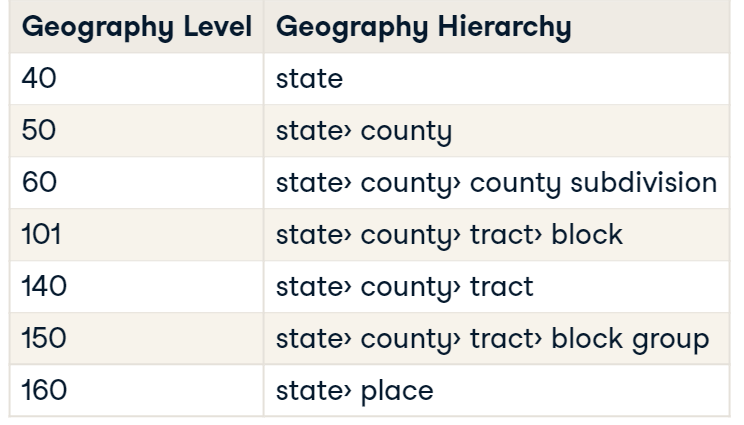

# **Part Geographies**

* state› congressional district› county (or part)
   * These geographies do not nest cleanly (ไม่เข้าใจ เหลื่อมกันเหรอ ?)

* the `"for"` predicate must be set to `"county (or part)"`, not just `"county"`.
* the `"in"` predicate must specify GEOIDs for each level up the hierarchy. `"state:42;congressional district:02"`
   * requests counties *in* the Second Congressional District *in* the state of Pennsylvania (42).

In [ ]:
predicates = {}
predicates["get"] = "NAME,P001001"
predicates["for"] = "county (or part):*"
predicates["in"] = "state:42;congressional district:02"
r = requests.get(base_url, params=predicates)
print(r.text)

[["NAME","P001001","state","congressional district","county (or part)"],
["Montgomery County (part), Congressional District 2 (111th Congress), Pennsylvania","36793","42","02","091"],
["Philadelphia County (part), Congressional District 2 (111th Congress), Pennsylvania","593484","42","02","101"]]


# ***Specific Places***

Look up geographic identifiers for major cities. The Census classifies cities and other municipalities as "places". You will find place codes using the [Geographic Codes Lookup at the Missouri Census Data Center](https://mcdc.missouri.edu/applications/geocodes/)

The variables to request are place names and total population.

The `requests` library has been imported and the `base_url` for the request is already set to request SF1 data for 2010.

* Using the Missouri Census Data Center, find (1) the two digit **state** code for Pennsylvania and (2) the five digit **place** codes for the cities of Philadelphia and Pittsburgh

* Set the "for" predicate to request the two `place` codes you found for Philadelphia and Pittsburgh, separated by a comma

* Set the "in" predicate to request the `state` code you found for Pennsylvania

In [ ]:
# Build dictionary of predicates
get_vars = ["NAME", "P001001"] # <- total population
predicates = {}
predicates["get"] = ",".join(get_vars)
predicates["for"] = "place:60000,61000" # ต้องติดกัน ห้ามเว้นวรรคจุลภาค
predicates["in"] = "state:42"

# Execute the request
r = requests.get(base_url, params=predicates)

# Show the response text
print(r.text)

[["NAME","P001001","state","place"],
["Philadelphia city, Pennsylvania","1526006","42","60000"],
["Pittsburgh city, Pennsylvania","305704","42","61000"]]


# ***Congressional Districts by State***

A Pennsylvania-based family advocacy nonprofit wants to find the average family size by Congressional district, so that they can call representatives from districts with relatively large families. For this exercise you will have to know the GEOID (ANSI Code) for Pennsylvania. If you don't remember it from a previous exercise, use the [Geographic Codes Lookup at the Missouri Census Data Center](https://mcdc.missouri.edu/applications/geocodes/).

The `requests` and `pandas` (as `pd`) packages have been imported. The `base_url` is defined, as is the `predicates` dictionary with the list of variables to request.

* Set the `"for"` key in the `predicates` dict to return all Congressional districts. Spell out congressional district in full.
* Set the `"in"` key in the `predicates` dict to only return geographies in the state of Pennsylvania.

* Check the values (print the head) of the `avg_family_size` column of the `cd` DataFrame.

* Based on the values you saw in the `avg_family_size column`, set it to an appropriate data type.

In [ ]:
predicates = {'get': 'NAME,P037001'}
# Build dictionary of predicates and execute the request
predicates["for"] = "congressional district:*"
predicates["in"] = "state:42"
r = requests.get(base_url, params=predicates)

# Construct the DataFrame
col_names = ["name", "avg_family_size", "state", "cd"]
cd = pd.DataFrame(columns=col_names, data=r.json()[1:])

# Print the head of the "avg_family_size" column
print(cd["avg_family_size"].head())

# Set data type and print
cd["avg_family_size"] = cd["avg_family_size"].astype(float)
cd

0    3.32
1    3.10
2    2.95
3    2.94
4    2.88
Name: avg_family_size, dtype: object


,name,avg_family_size,state,cd
0,"Congressional District 1 (111th Congress), Pen...",3.32,42,01
1,"Congressional District 2 (111th Congress), Pen...",3.10,42,02
2,"Congressional District 3 (111th Congress), Pen...",2.95,42,03
3,"Congressional District 4 (111th Congress), Pen...",2.94,42,04
4,"Congressional District 5 (111th Congress), Pen...",2.88,42,05
5,"Congressional District 8 (111th Congress), Pen...",3.12,42,08
6,"Congressional District 6 (111th Congress), Pen...",3.10,42,06
7,"Congressional District 7 (111th Congress), Pen...",3.12,42,07
8,"Congressional District 11 (111th Congress), Pe...",3.00,42,11
9,"Congressional District 9 (111th Congress), Pen...",2.94,42,09


# ***Zip Code Tabulation Areas***

In the marketing field, it is very common to want to know ZIP Code demographics. ZIP Code Tabulation Areas ("ZCTAs") are Census-defined equivalents to ZIP Codes that are built out of Census blocks. In this exercise you will request total population for all ZCTAs in the state of Alabama.

In `pandas`, an index can be used to retrieve particular rows. The GEOIDs are suitable row identifiers. In this exercise you will set a multilevel index based on the state and ZCTA of each row.

The `requests` and `pandas` packages have been imported. The `base_url` is defined, as is the `predicates` dictionary with the list of variables to request.

* Set the `"for"` key in the `predicates` dict to return *all ZCTAs*; spell out the geography in full as `"zip code tabulation area (or part)"`

* Set the `"in"` key in the `predicates` dict to only return ZCTAs in the state of Alabama; you will have to look up the FIPS code for Alabama in one of the online sources you have learned about

* Set the DataFrame index to be the concatenation of the `state` and `zcta` columns. Use `inplace=True` to **not** create a new DataFrame.

In [ ]:
# Build dictionary of predicates and execute the request
predicates = {}
predicates["get"] = ",".join(["NAME",  "P001001"])
predicates["for"] = "zip code tabulation area (or part):*"
predicates["in"] = "state:01"
r = requests.get(base_url, params=predicates)

# Construct the DataFrame
col_names = ["name", "total_pop", "state", "zcta"]
zctas = pd.DataFrame(columns=col_names, data=r.json()[1:])
zctas["total_pop"] = zctas["total_pop"].astype(int)

# Set multilevel index from GEOIDs and print the head
zctas.set_index(["state", "zcta"], inplace=True)
print(zctas.head())

                                    name  total_pop
state zcta                                         
01    30165  ZCTA5 30165 (part), Alabama         70
      31905  ZCTA5 31905 (part), Alabama          9
      35004         ZCTA5 35004, Alabama      10427
      35005         ZCTA5 35005, Alabama       7942
      35006         ZCTA5 35006, Alabama       3121


Notice that some of the ZCTAs are labelled "part". It is common in rural areas for ZIP Codes to overlap state borders.

# **ACS Detailed Table Request - Setup**

In [ ]:
HOST, dataset = "https://api.census.gov/data", "acs/acs1"
get_vars = ["B25045_" + str(i + 1).zfill(3) + "E" for i in range(19)]
get_vars = ["NAME"] + get_vars
print(get_vars)

['NAME', 'B25045_001E', 'B25045_002E', 'B25045_003E', 'B25045_004E', 'B25045_005E', 'B25045_006E', 'B25045_007E', 'B25045_008E', 'B25045_009E', 'B25045_010E', 'B25045_011E', 'B25045_012E', 'B25045_013E', 'B25045_014E', 'B25045_015E', 'B25045_016E', 'B25045_017E', 'B25045_018E', 'B25045_019E']


In [ ]:
import requests
import pandas as pd

HOST, dataset = "https://api.census.gov/data", "acs/acs1"
get_vars = ["B25045_" + str(i + 1).zfill(3) + "E" for i in range(19)]
get_vars = ["NAME"] + get_vars

# print(get_vars)
predicates = {}
predicates["get"] = ",".join(get_vars)
predicates["for"] = "us:*" # From all over US

# **Requesting Same Variables from Multiple Years**

In [ ]:
# Initialize data frame collector
dfs = []
for year in range(2011, 2018):
    base_url = "/".join([HOST, str(year), dataset])
    r = requests.get(base_url, params=predicates)
    df = pd.DataFrame(columns=r.json()[0], data=r.json()[1:])
    # Add column to hold year value
    df["year"] = year
    dfs.append(df)

# Concatenate all data frames in collector
us = pd.concat(dfs)
us.head()

,NAME,B25045_001E,B25045_002E,B25045_003E,B25045_004E,B25045_005E,B25045_006E,B25045_007E,B25045_008E,B25045_009E,B25045_010E,B25045_011E,B25045_012E,B25045_013E,B25045_014E,B25045_015E,B25045_016E,B25045_017E,B25045_018E,B25045_019E,us,year
0,United States,114991725,74264435,2510277,173746,1020070,1316461,71754158,7499566,45628394,18626198,40727290,8170479,2120124,3821261,2229094,32556811,12615981,16708018,3232812,1,2011
0,United States,115969540,74119256,2498950,165428,1003166,1330356,71620306,7138750,44942720,19538836,41850284,8190481,2117428,3862197,2210856,33659803,12982695,17229936,3447172,1,2012
0,United States,116291033,73843861,2491387,166955,1022752,1301680,71352474,7046650,44284406,20021418,42447172,8082693,2070846,3796464,2215383,34364479,13046247,17655910,3662322,1,2013
0,United States,117259427,73991995,2460464,164809,993511,1302144,71531531,6963152,43870068,20698311,43267432,8214112,2068912,3846898,2298302,35053320,13094778,18111142,3847400,1,2014
0,United States,118208250,74506512,2437175,167963,987917,1281295,72069337,6991648,43749617,21328072,43701738,8131681,2005318,3779705,2346658,35570057,13160651,18364976,4044430,1,2015


# ***Home Values in California***

California's major cities have been in the news for skyrocketing housing prices. How has the median home value changed over the last several years? In this exercise you will use a loop to request variable `B25077_001E` from seven ACS years and plot the value over time.

The `predicates` dictionary has been created, and is printed to the console. Notice that `state:06` sets the GEOID for California. `pandas` and `seaborn` have been imported using the usual aliases. `HOST` and `dataset` have been defined, and `dfs` is an empty list that has been initialized as a collector for the requested DataFrames.

* Construct a `range` object with integers from 2011 to 2017

* Create a column named `"year"`, with its value set to the current value of the `year` variable

* Set the `median_home_value` column data type to `int`

* Create a lineplot of home values. Set the first parameter (`x`) to `"year"`, set second parameter (`y`) to `"median_home_value"`

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


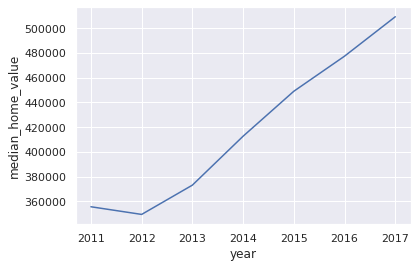

In [ ]:
HOST, dataset, predicates, dfs, col_names = 'https://api.census.gov/data', 'acs/acs1', {'get': 'NAME,B25077_001E', 'for': 'state:06'}, [], ['name', 'median_home_value', 'state']

# Loop over years 2011 to 2017
for year in range(2011, 2018):
    base_url = "/".join([HOST, str(year), dataset])
    r = requests.get(base_url, params=predicates)
    df = pd.DataFrame(columns=col_names, data=r.json()[1:])    
    # Add column to df to hold year value, append df to collector dfs
    df['year'] = year
    dfs.append(df)

# Concatenate all DataFrames, fix column type
states = pd.concat(dfs, ignore_index=True)
states["median_home_value"] = states["median_home_value"].astype(int)

sns.lineplot('year', 'median_home_value', data=states)
plt.show()

Housing prices have really shot up in California!

# ***Health Insurance Coverage***

The Affordable Care Act went into effect in 2014. One of its goals was to increase health insurance coverage among healthy young adults. Has health insurance coverage among 19-25 year olds changed with the passage of the Affordable Care Act? Let's calculate the percentage point change in coverage by state. Then plot the change against the initial percent covered rate.

ACS Table B27022 - "Health Insurance Coverage Status By Sex By Enrollment Status For Young Adults Aged 19 To 25" has been loaded. Columns names (printed to the console) indicate breakdowns by sex (`m/f`), school enrollment (`school`/`noschool`) and insurance (`insured`/`uninsured`).

As a reminder, we are using percentages throughout this course.

`pandas` and `seaborn` have been imported using the usual aliases.

* Calculate the percentage insured as `100` times the `insured_total`, divided by the `total` population

* Create a pivot table `states_pvt` with rows representing states (`index="state"`), columns as years (`columns="year"`), and values as `"pct_insured"`

* Calculate the change in percentage insured by subtracting `pct_insured_2013` from `pct_insured_2017`

* Plot the change in insurance rate (`y`) against the rate in 2013 (`x`)

In [ ]:
# Calculate percent insured
states["insured_total"] = states["m_school_insured"] +  states["m_noschool_insured"] + states["f_school_insured"] + states["f_noschool_insured"]
states["pct_insured"] = 100 * states["insured_total"] / states['total']

# Pivot the table and rename the columns
states_pvt = states.pivot(index='state', columns='year', values='pct_insured')
states_pvt.columns = ["pct_insured_2013", "pct_insured_2017"]

# Calculate the change in insurance rates 2013 to 2017
states_pvt["pct_insured_change"] = states_pvt['pct_insured_2017'] - states_pvt['pct_insured_2013']

# Plot the change against initial (2013) insurance rates
sns.lmplot(x='pct_insured_2013', y='pct_insured_change', data=states_pvt)
plt.show()

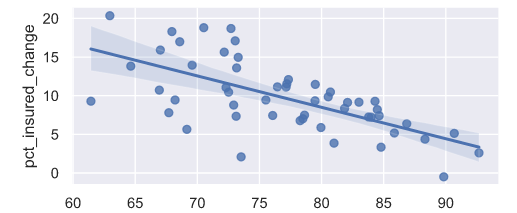

As expected, states that started with lower rates of insurance among 19-25 year olds saw much bigger increases in insurance coverage.

# ***Finding ACS Tables by Subject***

The American Community Survey covers a large number of social and economic topics--too many to present at once. We will introduce many in this course, but you should also know where to find table and variable names. If you append `/groups.html` to the base URL for any Census data product, you will see a list of detailed tables available for that product.

You should be able to construct the base URL for the ACS 2017 1-year sample. Append `/groups.html` and go to that URL in your browser. Now use your browser's "Find in Page" feature to find the table title `"MOVERS BETWEEN REGIONS IN THE UNITED STATES"`. What is the table name?

* B07101

# **Margins of Error**

* ก็คือตัวเลขที่เอามาสร้างช่วงความเชื่อมั่น

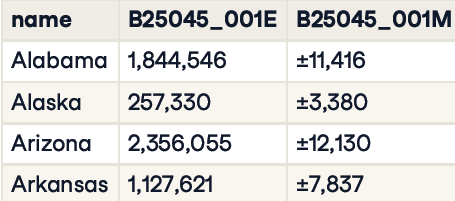

# **Relative Margin of Error**

$$RMOE = 100 \times MOE/Estimate$$

# **Standard Errors**

* The standard errors are not released, and cannot be constructed directly without household-level data.

* But they can be reversed engineered from the MOE.

$$Z_{90} = 1.645$$
$$SE_x = \frac{MOE_x}{Z_{90}}$$

# **Statistically Significant Difference**

$$Z = \frac{x_1 - x_2}{\sqrt{SE_{x_1}^2 + SE_{x_2}^2}}$$

# **Approximating SE for Derived Estimates**

* $$SE_{a+b+\cdots} = \sqrt{SE_a^2 + SE_b^2 + \cdots}$$
* $$MOE_{a+b+\cdots} = Z_{90}SE_{a+b+\cdots}$$

## ***Plotting Margins of Error over Time***

Inspect changing home prices in Philadelphia, PA, using a line plot with error bars. The data come from ACS 1-year sample Table B25077. The estimates and margin of error for each year from 2011 to 2017 have been downloaded and concatenated into a `pandas` DataFrame named `philly`. ACS table variables for the estimate and margin of error have been renamed to `median_home_value` and `median_home_value_moe`, respectively. (See the DataFrame in the console.)

`pandas` has been imported as `pd`.



```
   median_home_value  median_home_value_moe state county  year
0             142000                   4279    42    101  2011
0             142300                   5229    42    101  2012
0             136800                   4267    42    101  2013
0             148700                   3778    42    101  2014
0             150700                   3375    42    101  2015
0             154000                   3156    42    101  2016
0             166200                   3549    42    101  2017
```




* Create column `rmoe` (to hold the median home value Relative MOE) as `100` times the margin of error column divided by the estimate column

* `print` the DataFrame to inspect the Relative MOE

* Create an error bar plot: set the first argument to `"year"`; set the second argument to the name of the median home value column; set parameter `yerr` to the median home value MOE column; finally, set the data argument to the `philly` DataFrame

In [ ]:
# Import graphics packages
import seaborn as sns, matplotlib.pyplot as plt
sns.set()

# Calculate and inspect Relative Margin of Error
philly["rmoe"] = 100 * philly['median_home_value_moe'] / philly['median_home_value']
print(philly)

# Create line plot with error bars of 90% MOE
plt.errorbar('year', 'median_home_value', yerr='median_home_value_moe', data=philly)
plt.show()

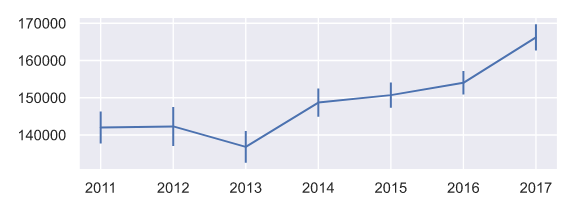

Notice that the Relative MOEs are very small—between 2% and 4%.

## ***Significance of Difference of Estimates***

A line plot with error bars gives you a rough idea of trends, but are the year-to-year differences statistically significant? In this exercise, you will determine significance of changing median home prices in Philadelphia. You will evaluate the differences from year to year between 2011 and 2017.

The formula for the two-sample Z-statistic is:

 $$Z = \frac{x_1 - x_2}{\sqrt{SE_{x_1}^2 + SE_{x_2}^2}}$$

A DataFrame `philly` is available with columns `median_home_value`, `median_home_value_moe`, and `year`.

```
   median_home_value  median_home_value_moe state county  year
0             142000                   4279    42    101  2011
0             142300                   5229    42    101  2012
0             136800                   4267    42    101  2013
0             148700                   3778    42    101  2014
0             150700                   3375    42    101  2015
0             154000                   3156    42    101  2016
0             166200                   3549    42    101  2017
```


`pandas` is imported as `pd`, and the `sqrt` function has been imported from the `numpy` module.

* Set `x1` to the current year median home value, and `x2` to the median home value for the prior year (current year minus 1)

* Set `se_x1` to the current year MOE of the median home value divided by `Z_CRIT`, and `se_x2` to the same calculation for the prior year.

* Use Python's ternary operator (`result1 if condition else result2`) to return the empty string if the absolute value of `z` is greater than `Z_CRIT`, and otherwise return `"not"`

In [ ]:
# Set the critical Z score for 90% confidence, prepare message
Z_CRIT = 1.645
msg = "Philadelphia median home values in {} were {}significantly different from {}."
for year in range(2012, 2018):
    # Assign current and prior year's median home value to variables
    x1 = int(philly[philly["year"] == year]["median_home_value"])
    x2 = int(philly[philly["year"] == year-1]["median_home_value"])
    
    # Calculate standard error as 90% MOE / critical Z score
    se_x1 = float(philly[philly["year"] == year]["median_home_value_moe"])
    se_x2 = float(philly[philly["year"] == year-1]["median_home_value_moe"])
    
    # Calculate two-sample z-statistic, output message if greater than critical Z score
    z = (x1 - x2) / sqrt(se_x1**2 + se_x2**2)
    print(msg.format(year, '' if z > Z_CRIT else 'not ', year - 1))



```
Philadelphia median home values in 2012 were not significantly different from 2011.
    Philadelphia median home values in 2013 were not significantly different from 2012.
    Philadelphia median home values in 2014 were significantly different from 2013.
    Philadelphia median home values in 2015 were not significantly different from 2014.
    Philadelphia median home values in 2016 were not significantly different from 2015.
    Philadelphia median home values in 2017 were significantly different from 2016.
```



## ***Significance of Difference of Proportions***

Bike commuting is still uncommon, but Washington, DC, has a decent share. It has increased by over 1 percentage point in the last few years, but is this a statistically significant increase? In this exercise you will calculate the standard error of a proportion, then a two-sample Z-statistic of the proportions.

The formula for the standard error (SE) of a proportion is:

$$SE_P = \frac{1}{N}\sqrt{SE_n^2 - P^2SE_N^2}$$

The formula for the two-sample Z-statistic is:

 $$Z = \frac{x_1 - x_2}{\sqrt{SE_{x_1}^2 + SE_{x_2}^2}}$$

The DataFrame `dc` is loaded. It has columns (shown in the console) with estimates (ending `"_est"`) and margins of error (ending `"_moe"`) for total workers and bike commuters.

The `sqrt` function has been imported from the `numpy` module.

* Calculate `bike_share` by dividing the number of bikers by the total number of workers

* Calculate the SE of the estimate of bikers and total workers, by dividing the MOE by `Z_CRIT`

* Calculate the SE of the proportions: `se_bike` is the SE of the subpopulation 
, `bike_share` is the proportion , and `se_total` is the SE of the population 

* Calculate $Z$:$x_1$ and $x_2$
 are the `bike_share` in 2017 and 2011; 
 and $SE_{x_1}$ and $SE_{x_2}$
 are `se_p` in 2017 and 2011

In [ ]:
# Set the critical Z score for 90% confidence
Z_CRIT = 1.645

# Calculate share of bike commuting
dc["bike_share"] = dc['bike_est'] / dc['total_est']

# Calculate standard errors of the estimate from MOEs
dc["se_bike"] = dc['bike_moe'] / Z_CRIT
dc["se_total"] = dc['total_moe'] / Z_CRIT
dc["se_p"] = sqrt(dc["se_bike"]**2 - dc["bike_share"]**2 * dc["se_total"]**2)**0.5 / dc["total_est"]

# Calculate the two sample statistic between 2011 and 2017
Z = (dc[dc["year"] == 2017]["bike_share"] - dc[dc["year"] == 2011]["bike_share"]) / sqrt(dc[dc["year"] == 2017]["se_p"]**2 + dc[dc["year"] == 2011]["se_p"]**2)
print(Z_CRIT < Z)



```
0    True
dtype: bool
```

Even though it's from a small base, you can see that DC has experienced statistically significant growth in the share of workers commuting by bicycle.

# **Loading Geospatial Data**

In [ ]:
geo_state = gpd.read_file('states_internet.gpkg')
type(geo_state)

geopandas.geodataframe.GeoDataFrame

In [ ]:
print(geo_state.columns)

Index(['state', 'postal', 'name', 'total', 'internet', 'dial_up', 'broadband',
       'satellite', 'other_service', 'internet_without_subscription',
       'no_internet', 'label_x', 'label_y', 'geometry'],
      dtype='object')


In [ ]:
geo_state.head()

,state,postal,name,total,internet,dial_up,broadband,satellite,other_service,internet_without_subscription,no_internet,label_x,label_y,geometry
0,06,CA,California,12888128,10708603,68137,9292907,783387,153121,375887,1803638,"-1,708,049.27","-667,730.62","MULTIPOLYGON (((-1716661.573 -1091585.267, -17..."
1,08,CO,Colorado,2082531,1760603,14444,1497662,147847,26520,68598,253330,"-479,502.24","-650,958.51","MULTIPOLYGON (((-787764.871 -679501.900, -7877..."
2,11,DC,District of Columbia,277985,216694,1037,195033,8542,3006,12719,48572,"1,960,213.05","-403,256.08","MULTIPOLYGON (((1950824.826 -402441.066, 19555..."
3,16,ID,Idaho,609124,476141,6054,365151,62011,9683,26236,106747,"-1,153,546.32","32,306.32","MULTIPOLYGON (((-1357254.591 77405.177, -13542..."
4,17,IL,Illinois,4818452,3806191,29112,3221458,271254,59063,174194,838067,"917,185.20","-491,248.60","MULTIPOLYGON (((720437.124 -496471.759, 720690..."


# **Geometry column**

* Coordinates for area

In [ ]:
geo_state['geometry'].head()

0    MULTIPOLYGON (((-1716661.573 -1091585.267, -17...
1    MULTIPOLYGON (((-787764.871 -679501.900, -7877...
2    MULTIPOLYGON (((1950824.826 -402441.066, 19555...
3    MULTIPOLYGON (((-1357254.591 77405.177, -13542...
4    MULTIPOLYGON (((720437.124 -496471.759, 720690...
Name: geometry, dtype: geometry

# **Geopandas Plot**

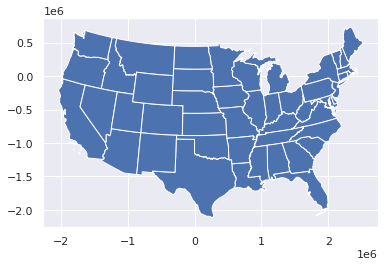

In [ ]:
geo_state.plot()
plt.show()

# **Choropleth Maps**

* Pass a column name

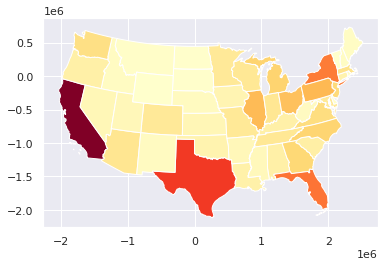

In [ ]:
geo_state.plot(column="internet", cmap = "YlOrRd")
plt.show()

ไอ้แบบข้างบนนี้มีปัญหา เพราะไม่ได้คิดต่อพื้นที่ ดังนั้นแบบข้างบนนี้ ที่ไหนมีคนเยอะ ยิ่งสีทึบ ซึ่งไม่ถูก เราต้องการร้อยละของการมีอินเตอร์เน็ตต่างหาก

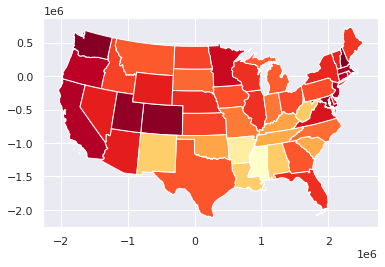

In [ ]:
geo_state["pct_has_computer"] = 100 * geo_state["internet"]/geo_state["total"]
geo_state.plot(column="pct_has_computer", cmap="YlOrRd")
plt.show()

# ***Choropleth Map of Internet Access***

Load a geospatial data file and create a simple choropleth map. The data come from ACS Table B28011 - "Internet Subscriptions in Household", and include columns representing `total` households, those with `internet` and `no_internet` access, and various kinds of internet connectivity.

Remember that choropleth maps should show rates or proportions, ***not counts***. After loading the data, you will calculate the percentage of households with no internet access, using columns `no_internet` and `total` households.


* Use the **`read_file`** method of `geopandas` to load the file `"states_internet.gpkg"`

* Calculate the percentage of households with no internet access as `100` times the number of households with `no_internet`, divided by the `total`

* Create a choropleth map of this percentage by setting the **`column`** parameter to the name of the new column; set the colormap (**`cmap`** parameter) to `"YlGnBu"`

Index(['state', 'postal', 'name', 'total', 'internet', 'dial_up', 'broadband',
       'satellite', 'other_service', 'internet_without_subscription',
       'no_internet', 'label_x', 'label_y', 'geometry'],
      dtype='object')


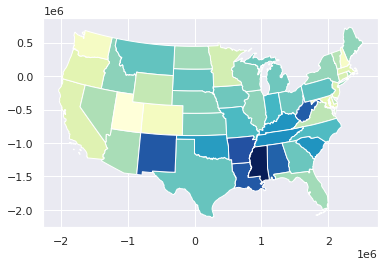

In [ ]:
import geopandas as gpd

# Load geospatial data
geo_state = gpd.read_file('states_internet.gpkg')

# View GeoDataFrame columns
print(geo_state.columns)

# Calculate percent of households with no internet
geo_state["pct_no_internet"] = 100 * geo_state['no_internet'] / geo_state['total']

# Create choropleth map using YlGnBu colormap
geo_state.plot(column='pct_no_internet', cmap="YlGnBu")
plt.show()

There seems to be a concentration of households with no internet access in Appalachia and the Deep South.

# ***Proportional Symbol Map of Households w/ Internet***

To map a raw count variable, you can use a proportional symbol map to create markers of sizes that are proportional to the data value being mapped. In this exercise you will find the centroid of each state, create a basemap of states, and place a circle at each centroid that is sized by the number of households with internet access.

The area of each marker should be proportional to the data value. Since marker sizes are provided as a diameter, you must take the square root of the column value. Marker sizes may look too big or too small. In this exercise, you will divide the marker size by 5--this is an aesthetic judgment call.

`geopandas` is imported using the usual alias, and the `sqrt` function has been imported from `numpy`.

The `geo_state` GeoDataFrame has been loaded.

* Call the centroid attribute on `geo_state_pt` and assign the result to the `geometry` column

* Create a basemap of state borders by calling the `plot` method on `geo_state`; set the `color` to `"tan"` and the `edgecolor` to `"black"`

* Create variable `ms` (to be passed to the `markersize` parameter) to the square root of the value of the `geo_state_pt["internet"]` column divided by `5`

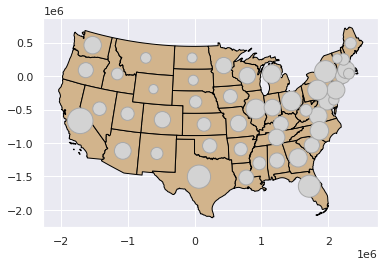

In [ ]:
# Create point GeoDataFrame at centroid of states
geo_state_pt = geo_state.copy()
geo_state_pt["geometry"] = geo_state_pt.centroid

# Set basemap and create variable for markersize
basemap = geo_state.plot(color='tan', edgecolor='black')
ms = sqrt(geo_state_pt["internet"])/5

# Plot proportional symbols on top of basemap
geo_state_pt.plot(ax=basemap, markersize=ms, color="lightgray", edgecolor="darkgray")
plt.show()

Proportional symbol maps are a useful tool to have in your toolbelt. Now let's combine a proportional symbol map and a choropleth map.

# ***Bivariate Map of Broadband Access***

Sometimes we want to map two variables at once, a so-called bivariate map. One way to do this is by combining a **choropleth map** and a **proportional symbol map**. You will use the `geo_state` GeoDataFrame again to create a choropleth of the percentage of internet households with broadband access, and overaly a proportional symbol map of the count of households with internet access.

You will set an `alpha` transparency on the proportional symbol marker so as to not completely obscure the underlying choropleth.

`geopandas` is imported using the usual alias, and the `sqrt` function has been imported from `numpy`.

The `geo_state` GeoDataFrame has been loaded.

* Use the `broadband` and `internet` columns to calculate the percentage of internet households with broadband

* Create a choropleth basemap of the new `pct_broadband` column using a yellow-green-blue colormap

* Set the **`markersize`** of the centroid points to the square root of the number of households with internet access divided by `5`; make the markers partially transparent by setting the `alpha` parameter to `0.7`

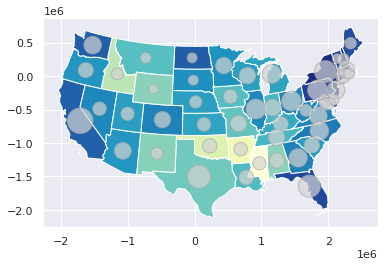

In [ ]:
# Create point GeoDataFrame at centroid of states
geo_state_pt = geo_state.copy()
geo_state_pt["geometry"] = geo_state_pt.centroid

# Calculate percentage of internet households with broadband
geo_state["pct_broadband"] = 100 * geo_state['broadband'] / geo_state['internet']

# Set choropleth basemap
basemap = geo_state.plot(column='pct_broadband', cmap='YlGnBu')

# Plot transparent proportional symbols on top of basemap
geo_state_pt.plot(ax=basemap, markersize=sqrt(geo_state_pt['internet'])/5, color="lightgray", edgecolor="darkgray", alpha=0.7)
plt.show()

These kind of bivariate maps are another way to explore relationships among variables. Does the percentage of broadband internet seem to be correlated with the total number of households with internet access? Do any states clearly buck this trend?

# ***Identifying Gentrifiable Tracts***

Identify and map the tracts that were gentrifiable in 2000. The criteria are:

1. Low median household income (MHI), determined as tract *MHI less than the MHI for the New York metro area*.

2. A low level of recent housing construction, determined as those tracts with *a percentage of housing built in the previous 20 years (since 1980) less than the percentage for the New York metro area*.

The GeoDataFrame `bk_2000`, with data for Brooklyn Census tracts in 2000, has been loaded for you.

* Calculate a boolean column `low_mhi` by checking to see whether `mhi` is less than `mhi_msa`

* Calculate a boolean column `low_recent_build` by checking to see whether the percentage of homes built in the 20 years prior to 2000 (`pct_recent_build`) is less than `pct_recent_build_msa`

* Use the `&` operator to classify the neighborhood as gentrifiable if both `low_mhi` and `low_recent_build` are true; the columns must be *surrounded by parenthesis*

* Map the gentrifiable tracts using the `YlGn` colormap

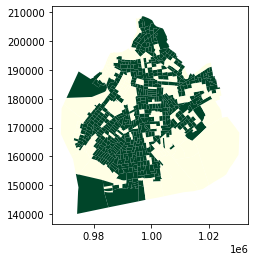

In [4]:
bk = gpd.read_file('brooklyn_tract_2000.gpkg')
bk_2000 = pd.read_pickle('tracts_brooklyn_2000.pickle')
bk_2000 = bk.merge(bk_2000, on=['state', 'county',	'tract'])

# Median income below MSA median income
bk_2000["low_mhi"] = bk_2000['mhi'] < bk_2000['mhi_msa']

# Recent construction below MSA
bk_2000["low_recent_build"] = bk_2000['pct_recent_build'] < bk_2000['pct_recent_build_msa']

# Identify gentrifiable tracts
bk_2000["gentrifiable"] = (bk_2000["low_mhi"]) & (bk_2000["low_recent_build"])

# Plot gentrifiable tracts
bk_2000.plot(column='gentrifiable', cmap='YlGn')
plt.show()

# ***Identifying Gentrifying Tracts***

Identify and map the tracts that were gentrifying between 2000 and 2010. To be classified as **gentifying**, tracts must have been **gentrifiable** in 2000 and meet these criteria:

1. The percentage of the population with Bachelor's degrees or higher must be increasing faster than for the New York metro area.

2. House values must have increased since 2000. In order to account for inflation, house values from 2000 will be multiplied by `1.2612`.

The GeoDataFrame `bk_2010` has been loaded for you. The column names are shown in the console. Because you will be comparing 2010 with 2000, it contains data from both years, in columns suffixed with `"_2000"` and `"_2010"`. It also has the column `gentrifiable` that you created in the last exercise.

* Set `increasing_education` to `True` if the increase in the percentage of population with Bachelor's degrees from 2000 to 2010 is greater than the MSA-level increase

* Set `increasing_house_value` to `True` if the `median_value_2010` is more than `1.2612` times greater than `median_value_2000`

* Using the `&` operator, set gentrifying to `True` if a tract is `gentrifiable` *and* has `increasing_education` *and* has `increasing_house_value`

* Map the `gentrifying` tracts using a `"YlOrRd"` colormap

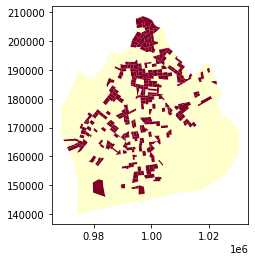

In [15]:
bk_2010 = b.merge(a, on=['state', 'county',	'tract'])
bk_2010["low_mhi"] = bk_2010['mhi'] < bk_2010['mhi_msa']
bk_2010["low_recent_build"] = bk_2010['pct_recent_build'] < bk_2010['pct_recent_build_msa']
bk_2010["gentrifiable"] = (bk_2010["low_mhi"]) & (bk_2010["low_recent_build"])

# Increase in percent BA greater than MSA
bk_2010["increasing_education"] = bk_2010['pct_ba_2010'] - bk_2010['pct_ba_2000'] > bk_2010['pct_ba_msa_2010'] - bk_2010['pct_ba_msa_2000']

# Increase in house value
bk_2010["increasing_house_value"] = bk_2010['median_value_2010'] > 1.2612 * bk_2010['median_value_2000']

# Identify gentryifying tracts
bk_2010["gentrifying"] = bk_2010["gentrifiable"] & bk_2010["increasing_education"] & bk_2010["increasing_house_value"]

# Plot gentrifying tracts
bk_2010.plot(column="gentrifying", cmap='YlOrRd')
plt.show()

Notice that the map has some gaps in it. This is because tracts change from decade to decade, usually splitting as population grows. The newly numbered tracts didn't match in those areas from 2000 to 2010. We will discuss this again later in the course.

# ***Mapping Gentrification***

Now that you have determined which tracts were gentrifiable in 2000 and which were gentrifying between 2000 and 2010, you will create a choropleth map. You will create a basemap of the Census tracts from 2000, and add layers of the gentrifiable and gentrifying tracts with custom-selected colors.


* Create a basemap of `bk_2000` with a fill `color` of `"white"` and an `edgecolor` of `"lightgray"`

* Filter `bk_2000` to plot only the `gentrifiable` tracts

* Now filter `bk_2010` (**Note the year**) to plot only the `gentrifying` tracts using `"red"`

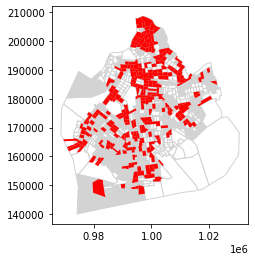

In [19]:
# Create a basemap
basemap = bk_2000.plot(color='white', edgecolor='lightgray')

# Plot gentrifiable tracts
gentrifiable_tracts = bk_2000[bk_2000['gentrifiable']]
gentrifiable_tracts.plot(ax=basemap, color="lightgray")

# Plot gentrifying tracts
gentrifying_tracts = bk_2010[bk_2010['gentrifying']]
gentrifying_tracts.plot(ax=basemap,color='red')
plt.show()

 Maps can be powerful tools for communicating about complex processes such as gentrification. Although gentrification often gets written about in local media, in a study from 2014, Michael Barton showed that quantitative analyses like the one you just did show that gentrification affects many more neighborhoods than media reports indicate.

 # **Index of Dissimilarity Formula**

 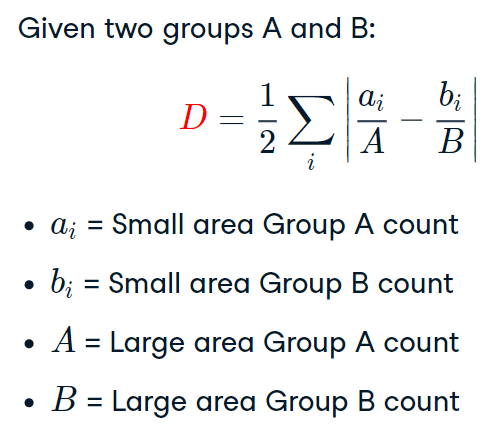

* $$0 \leq D \leq 1$$
* Higher value indicates greater segregation
* A & B represents categorical values
* ใช้ได้กับแค่ <ins>2 กลุ่ม</ins> ถ้ามากกว่านี้ ต้องใช้ ***Entropy Indexes***
* ถ้าจะใช้กับข้อมูลต่อเนื่อง ต้องใช้ ***Theil inequality indexes***


## ***Calculating D for One State***

Compute the Index of Dissimilarity for the state of Georgia. Remember that the formula for the Index of Dissimilarity is:

 
 $$D = \frac{1}{2}\sum{\left\lvert \frac{a}{A} - \frac{b}{B} \right\rvert}$$
 

In this case, Group A will be Whites, Group B will be Blacks.  $a$ and $b$  represent the White and Black population of the small geography (tracts), while $A$ and $B$ represent the White and Black population of the larger, containing geography (Georgia, postal code = GA, FIPS code = 13).

`pandas` has been imported using the usual alias, and the `tracts` DataFrame with population columns `"white"` and `"black"` has been loaded.

```
      state county   tract  white  black
0        01    001  020100   1601    217
1        01    001  020200    844   1214
2        01    001  020300   2538    647
3        01    001  020400   4030    191
4        01    001  020500   8438   1418
...     ...    ...     ...    ...    ...
73997    72    153  750501     16      1
73998    72    153  750502      7      0
73999    72    153  750503     12      1
74000    72    153  750601     26      0
74001    72    153  750602      8      0

[74002 rows x 5 columns]
```

* Create the new DataFrame `ga_tracts` with only the tracts in Georgia ("state" column should equal FIPS code "13")

* Provide the column names in a list (use the variables `w` and `b`) to print the sum of Nonhispanic Whites and Blacks in Georgia

* Take the White population of each tract divided by the sum of the White population, and subtract the Black population of each tract divided by the sum of the Black population; use the `w` and `b` variables to improve code readability

In [ ]:
# Define convenience variables to hold column names
w = "white"
b = "black"

# Extract Georgia tracts
ga_tracts = tracts[tracts['state']=='13']

# Print sums of Black and White residents of Georgia
print(ga_tracts[[w, b]].sum())

# Calculate Index of Dissimilarity and print rounded result
D = 0.5 * sum(abs(
  ga_tracts[w] / ga_tracts[w].sum() - ga_tracts[b] / ga_tracts[b].sum()))

print("Dissimilarity (Georgia):", round(D, 3))    



```
white    5413920
black    2910800

Dissimilarity (Georgia): 0.544
```

## ***Calculating D in a Loop***

Is Georgia's Index of Dissimilarity of of 0.544 high or low? Let's compare it to Illinois (FIPS = 17), home of Chicago.

Use a loop to calculate  for all states, then compare Georgia and Illinois.

Remember that the formula for the Index of Dissimilarity is:

 $$D = \frac{1}{2}\sum{\left\lvert \frac{a}{A} - \frac{b}{B} \right\rvert}$$
 
`pandas` has been imported using the usual alias, and the `tracts` DataFrame with population columns `"white"` and `"black"` has been loaded. The variables `w` and `b` have been defined with the column names `"white"` and `"black"`.

* Use the **`unique()`** method on the `"state"` column to create a list of state FIPS codes.

* Use a `for`-loop to store each element of states (that is, each FIPS code) in a variable named `state`.

* Filter the `tracts` DataFrame on each value of state, and assign to `tmp`.

* Calculate  for each state by applying the formula to `tmp`, and store the result in the dictionary `state_D`.

In [ ]:
# Get list of state FIPS Codes
states = list(tracts["state"].unique())

state_D = {}  # Initialize dictionary as collector
for state in states:
    # Filter by state
    tmp = tracts[tracts['state']==state]
    
    # Add Index of Dissimilarity to Dictionary
    state_D[state] = 0.5 * sum(abs(tmp[w]/tmp[w].sum() - tmp[b]/tmp[b].sum()))

# Print D for Georgia (FIPS = 13) and Illinois (FIPS = 17)    
print("Georgia D =", round(state_D["13"], 3))
print("Illinois D =", round(state_D["17"], 3))



```
Georgia D = 0.544
Illinois D = 0.73
```
Note that `D` for Illinois is much higher than for Georgia. In spite of the history of legal segregation in the American South, measures of segregation tend to be much higher for the industrialized cities (and their states) of the Northeast and Upper Midwest.

## ***Calculating D Using Grouping in Pandas***

Performing a calculation over subsets of a DataFrame is so common that pandas gives us an alternative to doing it in a loop, the **`groupby`** method. In the sample code, **`groupby`** is used first to group `tracts` by state, i.e. those rows having the same value in the `"state"` column. The **`sum()`** method is applied by group to the columns.

This exercise also makes use of `merge`, another useful `pandas` method, to join the grouped sums to the individual tracts. Don't worry about the syntax for now. **`merge`** will be explained in a later lesson.

`pandas` has been imported using the usual alias, and the `tracts` DataFrame with population columns white and black has been loaded. The variables `w` and `b` have been defined with the column names `"white"` and `"black"`.

tracts before merging



```
      state county   tract  white  black
0        01    001  020100   1601    217
1        01    001  020200    844   1214
2        01    001  020300   2538    647
3        01    001  020400   4030    191
4        01    001  020500   8438   1418
...     ...    ...     ...    ...    ...
73997    72    153  750501     16      1
73998    72    153  750502      7      0
73999    72    153  750503     12      1
74000    72    153  750601     26      0
74001    72    153  750602      8      0

[74002 rows x 5 columns]
```
sums_by_state



```
          white    black
state                   
01      3204402  1244437
02       455320    21949
04      3695647   239101
05      2173469   447102
06     14956253  2163804
08      3520793   188778
09      2546262   335119
10       586752   186782
11       209464   301053
12     10884722  2851100
13      5413920  2910800
15       309343    19904
16      1316243     8875
17      8167753  1832924
18      5286453   582140
19      2701123    86906
20      2230539   162700
21      3745655   333075
22      2734884  1442420
23      1254297    15154
24      3157958  1674229
25      4984800   391693
26      7569939  1383756
27      4405142   269141
28      1722287  1093512
29      4850748   687149
30       868628     3743
31      1499753    80959
32      1462081   208058
33      1215050    13625
34      5214878  1125401
35       833810    35462
36     11304247  2783857
37      6223995  2019854
38       598007     7720
39      9359263  1389115
40      2575381   272071
41      3005848    64984
42     10094652  1327091
44       803685    51560
45      2962740  1279998
46       689502     9959
47      4800782  1049391
48     11397345  2886825
49      2221719    25951
50       590223     5943
51      5186450  1523704
53      4876804   229603
54      1726256    62122
55      4738411   350898
56       483874     4351
72        26946     4663
```




* Create `sums_by_state` using **`groupby`** and print the result.
* Create `tracts` using **`merge`** and print the result.
* Calculate $\left\lvert\frac{a_i}{A} - \frac{b_i}{B}\right\rvert$ and store it in a new column `D`. (Reminder: The sum of White and Black populations ( $A$ and $B$) was already calculated and is available in the `tracts` DataFrame in the columns suffixed with `"_sum"`).

* Sum the column `D` by state using the **`groupby`** method, and multiply by `0.5`.

In [ ]:
# Sum Black and White residents grouped by state
sums_by_state = tracts.groupby("state")[[w, b]].sum()
print(sums_by_state.head())

# Merge the sum with the original tract populations
tracts = pd.merge(tracts, sums_by_state, left_on="state", 
    right_index=True, suffixes=("", "_sum"))
print(tracts.head())

# Calculate inner expression of Index of Dissimilarity formula
tracts["D"] = abs(tracts['white'] / tracts['white' + "_sum"] - tracts['black'] / tracts['black' + "_sum"])

# Calculate the Index of Dissimilarity
print(0.5 * tracts.groupby('state')["D"].sum())



```
           white    black
    state                   
    01      3204402  1244437
    02       455320    21949
    04      3695647   239101
    05      2173469   447102
    06     14956253  2163804
      state county   tract  white  black  white_sum  black_sum
    0    01    001  020100   1601    217    3204402    1244437
    1    01    001  020200    844   1214    3204402    1244437
    2    01    001  020300   2538    647    3204402    1244437
    3    01    001  020400   4030    191    3204402    1244437
    4    01    001  020500   8438   1418    3204402    1244437
    state
    01    0.577
    02    0.493
    04    0.449
    05    0.646
    06    0.603
    08    0.619
    09    0.655
    10    0.435
    11    0.727
    12    0.577
    13    0.544
    15    0.478
    16    0.376
    17    0.730
    18    0.680
    19    0.561
    20    0.550
    21    0.578
    22    0.552
    23    0.527
    24    0.650
    25    0.608
    26    0.726
    27    0.578
    28    0.489
    29    0.701
    30    0.374
    31    0.637
    32    0.457
    33    0.424
    34    0.669
    35    0.376
    36    0.776
    37    0.515
    38    0.473
    39    0.690
    40    0.549
    41    0.524
    42    0.711
    44    0.595
    45    0.464
    46    0.526
    47    0.671
    48    0.569
    49    0.396
    50    0.392
    51    0.504
    53    0.530
    54    0.558
    55    0.755
    56    0.445
    72    0.386
    Name: D, dtype: float64
```



Index of Dissimilarity ranges for values under 0.4 for states like Vermont and Montana, but is over 0.7 for states like New York and Pennsylvania. Any guesses why?

# **Census API Request: Metro/Micropolitan Data**


In [11]:
import requests

# Build base URL
HOST = "https://api.census.gov/data"
year = "2012"
dataset = "acs/acs5"
base_url = "/".join([HOST, year, dataset])

# Specify requested variables
# B01001_001E = Total population (estimate)
# B03002_003E = Nonhispanic White population (estimate)
# B03002_004E = Nonhispanic Black population (estimate)
get_vars = ["NAME", "B01001_001E", "B03002_003E", "B03002_004E"]

# Create dictionary of predicates
predicates = {}
predicates["get"] = ",".join(get_vars)

# Requested geography
predicates["for"] = "metropolitan statistical area/micropolitan statistical area:*"
r = requests.get(base_url, params=predicates)
msa = pd.DataFrame(columns=['name', 'pop', 'white', 'black', 'msa'], data=r.json()[1:])
msa[["pop", "white", "black"]] = msa[["pop", "white", "black"]].astype(int)
msa.head()

,name,pop,white,black,msa
0,"San Francisco-Oakland-Fremont, CA Metro Area",4348880,1848583,346719,41860
1,"San Germán-Cabo Rojo, PR Metro Area",137194,802,14,41900
2,"San Jose-Sunnyvale-Santa Clara, CA Metro Area",1843860,650273,43126,41940
3,"San Juan-Caguas-Guaynabo, PR Metro Area",2473084,17978,2661,41980
4,"Searcy, AR Micro Area",77007,68992,3197,42620


## ***Joining Tracts and Metropolitan Areas***

In order to focus on how the merge method works, a function that calculates the Index of Dissimilarity has been provided for you. 

To apply this function, you need to add the MSA identifiers to the `tracts` DataFrame. 


```
      state county   tract  white  black
0        01    001  020100   1601    217
1        01    001  020200    844   1214
2        01    001  020300   2538    647
3        01    001  020400   4030    191
4        01    001  020500   8438   1418
...     ...    ...     ...    ...    ...
73997    72    153  750501     16      1
73998    72    153  750502      7      0
73999    72    153  750503     12      1
74000    72    153  750601     26      0
74001    72    153  750602      8      0

[74002 rows x 5 columns]
```



You will use `state` and `county`, present in both DataFrames, as the join keys. At the end, you will use `seaborn`'s `stripplot` method to show the ten most segregated metros.

The `tracts` DataFrame that you have used previously is loaded. Population data by MSA is loaded as `msa`, and the first few rows are displayed in the console. 

```
                                               name  population   white  black    msa
0                           Adjuntas, PR Micro Area       19458     140      0  10260
1    Aguadilla-Isabela-San Sebastián, PR Metro Area      305538    5602    231  10380
2                              Coamo, PR Micro Area       71596     228     53  17620
3                            Fajardo, PR Metro Area       70633     543    195  21940
4                            Guayama, PR Metro Area       84017     271     95  25020
..                                              ...         ...     ...    ...    ...
950                     York-Hanover, PA Metro Area      434579  374577  21259  49620
951    Youngstown-Warren-Boardman, OH-PA Metro Area      564768  476005  59997  49660
952                        Yuba City, CA Metro Area      166859   90001   3511  49700
953                             Yuma, AZ Metro Area      196420   69613   3357  49740
954                       Zanesville, OH Micro Area       85996   79583   2825  49780

[955 rows x 5 columns]
```


Finally, `msa_def` is loaded with the counties that make up each MSA.

```
        msa        msa_name                    metro_micro          county_name    state_name state county
0     10100    Aberdeen, SD  Micropolitan Statistical Area         Brown County  South Dakota    46    013
1     10100    Aberdeen, SD  Micropolitan Statistical Area       Edmunds County  South Dakota    46    045
2     10140    Aberdeen, WA  Micropolitan Statistical Area  Grays Harbor County    Washington    53    027
3     10180     Abilene, TX  Metropolitan Statistical Area      Callahan County         Texas    48    059
4     10180     Abilene, TX  Metropolitan Statistical Area         Jones County         Texas    48    253
...     ...             ...                            ...                  ...           ...   ...    ...
1877  49700   Yuba City, CA  Metropolitan Statistical Area        Sutter County    California    06    101
1878  49700   Yuba City, CA  Metropolitan Statistical Area          Yuba County    California    06    115
1879  49740        Yuma, AZ  Metropolitan Statistical Area          Yuma County       Arizona    04    027
1880  49780  Zanesville, OH  Micropolitan Statistical Area     Muskingum County          Ohio    39    119
1881  49820      Zapata, TX  Micropolitan Statistical Area        Zapata County         Texas    48    505

[1882 rows x 7 columns]
```

`pandas` and `seaborn` have been loaded with the usual aliases.

* Use the **`nlargest`** method on the `msa` DataFrame to return the `50` largest metros by `"population"`.

* Both `tracts` and `msa_def` have columns `"state"` and `"county"`. Use the `merge` method with the `on` parameter to join on these columns.

* Use the `merge` method to join `msa` and `msa_D` on the MSA identifier.

In [ ]:
def dissimilarity(df, col_A, col_B, group_by):
    
    # Sum Group A and Group B by grouping column
    grouped_sums = df.groupby(group_by)[[col_A, col_B]].sum()
    tmp = pd.merge(df, grouped_sums, left_on = group_by, 
                   right_index = True, suffixes = ("", "_sum"))
    
    # Calculate inner expression
    tmp["D"] = abs(tmp[col_A] / tmp[col_A + "_sum"] - tmp[col_B] / tmp[col_B + "_sum"])
    
    # Calculate Index of Dissimilarity and convert to DataFrame
    return 0.5 * tmp.groupby(group_by)["D"].sum().to_frame()

# Find identifiers for 50 largest metros by population
msa50 = list(msa.nlargest(n=50, columns='population')["msa"])

# Join MSA identifiers to tracts, restrict to largest 50 metros
msa_tracts = pd.merge(tracts, msa_def, on=['state', 'county'])
msa_tracts = msa_tracts[msa_tracts["msa"].isin(msa50)]

# Calculate D using custom function, merge back into MSA
msa_D = dissimilarity(msa_tracts, "white", "black", "msa")
msa = pd.merge(msa, msa_D, left_on='msa', right_index=True)

# Plot ten most segregated metros
sns.stripplot(x = "D", y = "name", data = msa.nlargest(10, "D"))
plt.show()

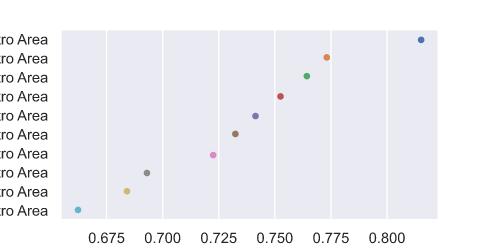

Notice that the top 10 most segregated metros are dominated by the old industrialized cities of the Northeast and Upper Midwest.

## ***Create Function to Calculate D***

Calculating the Index of Dissimilarity requires multiple steps and has high reuse potential. In this exercise you will create the function `dissimilarity` that we used in the previous exercise. The function's input parameters will be a DataFrame of small area geographies (such as tracts) and three column names: the two columns with population counts of Group A and Group B, and the column with the names or geographic identifiers of the container geography (such as states or metro areas).

As a reminder, the formula the the Index of Dissimilarity is:

 
 $$D = \frac{1}{2}\sum{\left\lvert \frac{a}{A} - \frac{b}{B} \right\rvert}$$
 

`pandas` has been imported using the usual alias. The `groupby` and `merge` are already completed for you in the code below.


* Calculate the expression inside the absolute value bars based on the formula: The column names for $A$ and $B$ are formed by adding the suffix `"_sum"` to the parameters `col_A` and `col_B`

* The **`sum`** method on a single column returns a series; use the **`to_frame()`** method to convert the series to a DataFrame

* Test the new function on `tracts`: calculate White-Black dissimilarity by MSA name

In [ ]:
def dissimilarity(df, col_A, col_B, group_by):

    # Sum Group A and Group B by grouping column
    grouped_sums = df.groupby(group_by)[[col_A, col_B]].sum()
    tmp = pd.merge(df, grouped_sums, left_on=group_by, 
                   right_index=True, suffixes=("", "_sum"))
    
    # Calculate inner expression
    tmp["D"] = abs(tmp[col_A] / tmp[col_A + "_sum"] - tmp[col_B] / tmp[col_B + "_sum"])
    
    
    # Calculate Index of Dissimilarity and convert to DataFrame
    return 0.5 * tmp.groupby(group_by)["D"].sum().to_frame()
  
msa_D = dissimilarity(msa_tracts, 'white', 'black', "msa_name")
print(msa_D.head())

Usually we prefer to use geographic identifiers as join keys or, in this case, a grouping variable. This time we used the MSA name to make the results easier to understand.

## ***Characteristics of Segregated Metros***

So, you've determined that segregation is higher in Northern industrialized metro areas. But these are also large, diverse metro areas. Are low diversity cities just getting a pass? Let's compare how size and diversity correlate with metropolitan segregation.

The `msa` DataFrame, as modified previously with the addition of the Index of Dissimilarity, has been loaded. The columns are listed in the console. Total population appears in the population column.

`pandas` and `seaborn` have been loaded using the usual aliases.

* Plot segregation on the y-axis vs. metropolitan population on the x-axis

* Calculate the percentage African-American, and assign to column `black_pct`

* Plot segregation vs. percentage African-American

* Create a scatterplot of segregation vs. percentage African-American. Add the `size` and `hue` parameters, both set to the column `"population"`

In [ ]:
# Are large metros more segregated?
sns.lmplot(x='population', y='D', data=msa)
plt.show()

# Calculate percentage African-American
msa["black_pct"] = 100 * msa['black'] / msa['population']

# Are more diverse metros more segregated?
sns.lmplot(x='black_pct', y='D', data=msa)
plt.show()

# Display metro size, percent Black, and segregation in one plot
sns.scatterplot(x='black_pct', y='D', data=msa, size='population', hue='population')
plt.show()

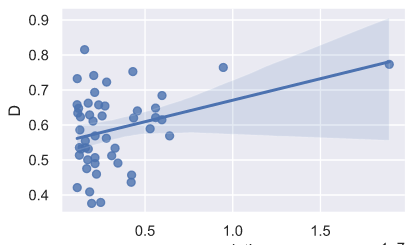

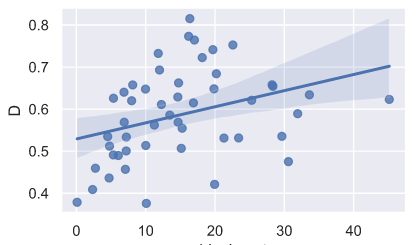

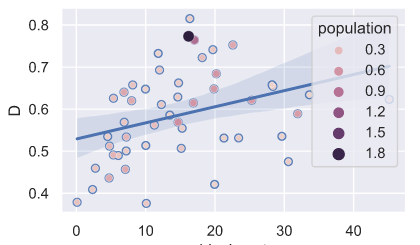

We have to be sensitive to the limitations of the measures we use. Is the Index of Dissimilarity showing that larger, more diverse metros are more segregated? A more likely explanation is that the index is not useful as a measure of segregation in very homogeneous metros.

# **Tidy Data**



```
     msa   male_lf female_lf
0   12060  400843  481425
1   25540   30656   35046
2   26420  231346  268923
3   26900   55943   71036
...
```

* Wide format: *variable names are column names*



```
      msa    sex labor_force
0   12060   male      400843
1   25540   male       30656
2   26420   male      231346
3   26900   male       55943
...
49  12060 female      481425
50  25540 female       35046
51  26420 female      268923
52  26900 female       71036
```
* Tidy format: *variable names distinguishes rows*

# **`pd.melt`**



In [ ]:
msa_labor_force.columns = ["msa", "male", "female"]
tidy_msa_labor_force = msa_labor_force.melt(id_vars = ["msa"], # ถ้ามีหลายคอลัมน์ที่ใช้ระบุตัวอย่าง ก็จะมีหลายตัว
                                            value_vars = ["male", "female"],
                                            var_name = "sex",
                                            value_name = "labor_force")

## ***Calculating Unemployment***

In this exercise, you will plot metropolitan unemployment against segregation. Unemployment is calculated as a proportion of the labor force (people employed or seeking employment). `msa_black_emp` is loaded with counts of Black male and female unemployment and labor force participation taken from subject table `C23002B` in the 2012 5-year ACS. You will calculate unemployment percentages and join with the previously calculated Index of Dissimilarity, loaded in the DataFrame `msa`.

`pandas` and `seaborn` have been loaded using the usual aliases.

* View the first few rows of `msa_black_emp` in the console

* Calculate the percentages of male, female, and total unemployment as `100` times the unemployment count divided by the labor force count. Add male and female together for totals.

* Use **`pd.merge`** to join `msa` and `msa_black_emp` on the column `"msa"`. This column is in both the left and right DataFrames.

* Use **`sns.lmplot`** to plot `"D"` on the x-axis and `"pct_unemp"` on the y-axis.

In [ ]:
## View the first few rows of msa_black_emp
print(msa_black_emp.head())

# Calculate percentage unemployment for male, female, and all
msa_black_emp["pct_male_unemp"] = 100 * msa_black_emp["male_unemp"] / msa_black_emp["male_lf"]
msa_black_emp["pct_female_unemp"] = 100 * msa_black_emp["female_unemp"] / msa_black_emp["female_lf"]
msa_black_emp["pct_unemp"] = 100 * (msa_black_emp["female_unemp"] + msa_black_emp["male_unemp"]) / (msa_black_emp["female_lf"] + msa_black_emp["male_lf"])

# Merge with Index of Dissimilarity calculated previously
msa_black_emp = pd.merge(msa, msa_black_emp, on="msa")

# Plot unemployment vs. segregation
sns.lmplot(x='D', y='pct_unemp', data=msa_black_emp)
plt.show()



```
    male_lf  male_unemp  female_lf  female_unemp    msa  pct_male_unemp  pct_female_unemp  pct_unemp
0    400843       68832     481425         74942  12060          17.172            15.567     16.296
1     30656        6194      35046          4939  25540          20.205            14.093     16.945
2    231346       32716     268923         31256  26420          14.142            11.623     12.788
3     55943       10781      71036         11696  26900          19.271            16.465     17.701
4     62434       11324      74028         11385  27260          18.138            15.379     16.641
5     55237       10713      65318          9596  28140          19.395            14.691     16.846
6     48904        8365      48609          7908  29820          17.105            16.269     16.688
7     37501        6736      44344          7332  31140          17.962            16.534     17.189
8    122339       22373     154956         23809  32820          18.288            15.365     16.654
9    263253       50483     308666         48521  33100          19.177            15.720     17.311
10    46984       11813      62912          9980  33340          25.143            15.863     19.831
11    57630       10201      56161          9687  33460          17.701            17.249     17.478
12    31539        4541      33371          3519  12420          14.398            10.545     12.417
13   170462       26540     212785         25631  12580          15.569            12.045     13.613
14    64840        9936      81833         11430  13820          15.324            13.967     14.567
15    85042       13539      93168         12964  14460          15.920            13.915     14.872
16    25039        5162      30780          4773  15380          20.616            15.507     17.799
17    97243       17669     119052         17473  16740          18.170            14.677     16.247
18   320901       73656     411199         76147  16980          22.953            18.518     20.462
19    54891       11341      63057          9062  17140          20.661            14.371     17.298
20    81236       20646     101293         17960  17460          25.415            17.731     21.151
21    60989       11184      68007          8978  18140          18.338            13.202     15.630
22   217278       31346     259299         31072  19100          14.427            11.983     13.097
23    37121        5796      33906          5127  19740          15.614            15.121     15.379
24   185577       54021     236724         50986  19820          29.110            21.538     24.865
25   111003       15084     137470         14787  47260          13.589            10.757     12.022
26   358412       45880     421502         42261  47900          12.801            10.026     11.301
27    54740        7847      66136          8010  34980          14.335            12.111     13.118
28    82287       13264      97102         12958  35380          16.119            13.345     14.617
29   716188      114518     883744        113096  35620          15.990            12.797     14.226
30    28319        2972      31334          3252  36420          10.495            10.379     10.434
31    80970       14660      91721         13604  36740          18.105            14.832     16.367
32   246860       46461     306250         44927  37980          18.821            14.670     16.523
33    50572        8197      45786          6103  38060          16.209            13.329     14.840
34    37148        6815      44465          6350  38300          18.346            14.281     16.131
35    16638        3122      13675          2358  38900          18.764            17.243     18.078
36    20768        3000      20854          2868  39300          14.445            13.753     14.098
37    52873        8160      64769          7590  39580          15.433            11.719     13.388
38    80549       12430     100425         11758  40060          15.432            11.708     13.365
39    64944       12690      71469         13633  40140          19.540            19.075     19.297
40    32554        7437      36389          6851  40900          22.845            18.827     20.724
41   103270       23154     132117         20911  41180          22.421            15.828     18.720
42    31349        3863      32515          3077  41700          12.323             9.463     10.867
43    38019        5521      32422          4902  41740          14.522            15.119     14.797
44    79312       14248      87133         15158  41860          17.964            17.396     17.667
45    13186        1813      11278          1826  41940          13.749            16.191     14.875
46    49359       10578      44436          8931  41980          21.431            20.099     20.800
47    50334        7876      41580          5918  42660          15.647            14.233     15.008
48    70751       13817      82024         12364  45300          19.529            15.074     17.137
```
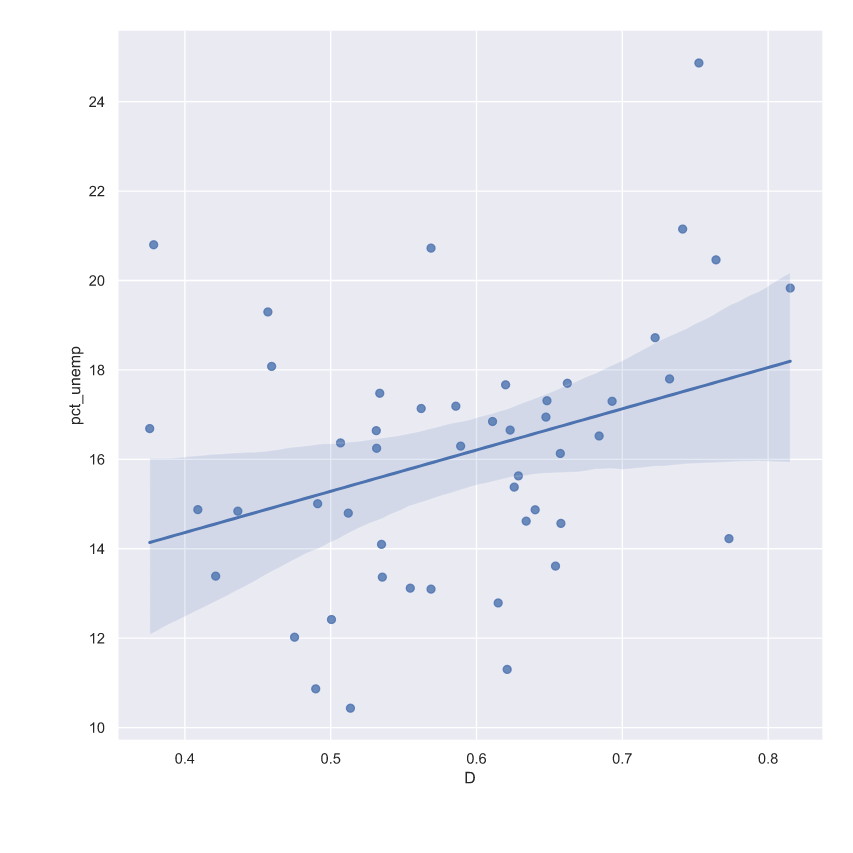

It looks like Black-White segregation has an impact on Black employment. But men and women participate in the labor force at different rates. Let's explore to see if there are differences by gender.

## ***Impacts of Black-White Segregation by Sex***

`seaborn` lets us plot two variables conditioned on a third variable. The two variables will be dissimilarity and unemployment, and we will condition the scatterplot on a third variable, `sex`, by changing the color of the points and regression line based on the sex being reported. But first we have to turn `msa_black_emp` into a "tidy" DataFrame.

`msa_black_emp` has been loaded, with columns `"pct_male_unemp"` and `"pct_female_unemp"` as calculated in the last exercise.

`pandas` and `seaborn` have been loaded using the usual aliases.

* Restrict `msa_black_emp` to only contain the columns `"msa"`, `"D"`, `"pct_male_unemp"`, and `"pct_female_unemp"`.

* Rename the columns to `"msa"`, `"D"`, `"male"`, and `"female"`. (Note, there is no change to the first two columns.)

* Use **`melt`** on `tidy_black_emp` to create a tidy DataFrame, with `"msa"` and `"D"` as the **`id_vars`** and `"male"` and `"female"` as the **`value_vars`**.

```
tidy_black_emp

      msa      D    male  female
0   12060  0.589  17.172  15.567
1   25540  0.648  20.205  14.093
2   26420  0.615  14.142  11.623
3   26900  0.662  19.271  16.465
4   27260  0.531  18.138  15.379
5   28140  0.611  19.395  14.691
6   29820  0.376  17.105  16.269
7   31140  0.586  17.962  16.534
8   32820  0.623  18.288  15.365
9   33100  0.648  19.177  15.720
10  33340  0.815  25.143  15.863
11  33460  0.534  17.701  17.249
12  12420  0.501  14.398  10.545
13  12580  0.654  15.569  12.045
14  13820  0.658  15.324  13.967
15  14460  0.640  15.920  13.915
16  15380  0.732  20.616  15.507
17  16740  0.532  18.170  14.677
18  16980  0.764  22.953  18.518
19  17140  0.693  20.661  14.371
20  17460  0.741  25.415  17.731
21  18140  0.629  18.338  13.202
22  19100  0.569  14.427  11.983
23  19740  0.626  15.614  15.121
24  19820  0.753  29.110  21.538
25  47260  0.475  13.589  10.757
26  47900  0.621  12.801  10.026
27  34980  0.555  14.335  12.111
28  35380  0.634  16.119  13.345
29  35620  0.773  15.990  12.797
30  36420  0.514  10.495  10.379
31  36740  0.507  18.105  14.832
32  37980  0.684  18.821  14.670
33  38060  0.436  16.209  13.329
34  38300  0.657  18.346  14.281
35  38900  0.459  18.764  17.243
36  39300  0.535  14.445  13.753
37  39580  0.421  15.433  11.719
38  40060  0.535  15.432  11.708
39  40140  0.457  19.540  19.075
40  40900  0.569  22.845  18.827
41  41180  0.723  22.421  15.828
42  41700  0.490  12.323   9.463
43  41740  0.512  14.522  15.119
44  41860  0.620  17.964  17.396
45  41940  0.409  13.749  16.191
46  41980  0.379  21.431  20.099
47  42660  0.491  15.647  14.233
48  45300  0.562  19.529  15.074
```

* Plot unemployment vs. dissimilarity. Set the **`hue`** parameter to `"sex"`.


In [ ]:
# Restrict DataFrame to columns of interest, rename columns
tidy_black_emp = msa_black_emp[["msa", "D", "pct_male_unemp", "pct_female_unemp"]]
tidy_black_emp.columns = ["msa", "D", "male", "female"]

# Use melt to create tidy DataFrame, and view the first few rows
tidy_msa_emp = tidy_black_emp.melt(id_vars = ["msa", "D"], 
    value_vars = ["male", "female"], var_name = "sex", 
    value_name = "unemployment")

# Visually compare male and female unemployment
sns.lmplot(x='D', y='unemployment', hue='sex', data=tidy_msa_emp)
plt.show()



```
       msa      D   sex  unemployment
    0  12060  0.589  male        17.172
    1  25540  0.648  male        20.205
    2  26420  0.615  male        14.142
    3  26900  0.662  male        19.271
    4  27260  0.531  male        18.138
```
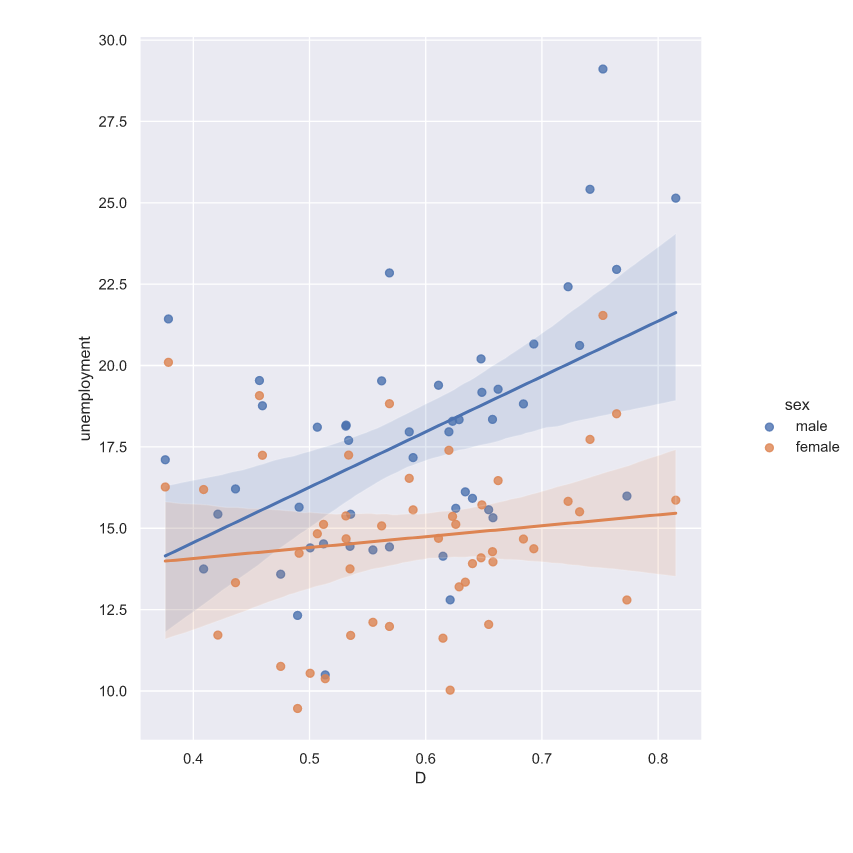

Segregation appears to have a much larger impact on male employment among African-Americans! Now let's see how this compares with White male employment.

# ***White and Black Unemployment***

In this exercise you will compare metropolitan unemployment between White and Black males. `msa_black_emp` is loaded. A new DataFrame, `msa_white_emp`, with data from table C23002A from the 2012 5-year ACS is also loaded. Percentage unemployment has already been calculated for you. You will restrict both DataFrames to the columns of interest (the ones showing percentage male employment), join the DataFrames, and **`melt`** them into a tidy DataFrame for visualization with `seaborn`.

`pandas` and `seaborn` have been loaded using the usual aliases.

* Create `tidy_white_emp` by restricting `msa_white_emp` to the columns `"msa"` and `"pct_male_unemp"`, then rename the second column to `"white"`

* Merge `tidy_black_emp` and `tidy_white_emp` on the `"msa"` column; assign to `tidy_emp`

* Use **`melt`** on `tidy_emp`. The **`value_vars`** should be the names of the two race columns; set **`var_name`** to `"race"` and **`value_name`** to `"unemployment"`

* Plot unemployment vs. dissimilarity, conditioning on race using the hue parameter

```
                                                 name  male_lf  male_unemp  female_lf  female_unemp    msa      D  pct_male_unemp  pct_female_unemp  pct_unemp
0       Atlanta-Sandy Springs-Marietta, GA Metro Area   400843       68832     481425         74942  12060  0.589          17.172            15.567     16.296
1   Hartford-West Hartford-East Hartford, CT Metro...    30656        6194      35046          4939  25540  0.648          20.205            14.093     16.945
2           Houston-Sugar Land-Baytown, TX Metro Area   231346       32716     268923         31256  26420  0.615          14.142            11.623     12.788
3                  Indianapolis-Carmel, IN Metro Area    55943       10781      71036         11696  26900  0.662          19.271            16.465     17.701
4                         Jacksonville, FL Metro Area    62434       11324      74028         11385  27260  0.531          18.138            15.379     16.641
5                       Kansas City, MO-KS Metro Area    55237       10713      65318          9596  28140  0.611          19.395            14.691     16.846
6                   Las Vegas-Paradise, NV Metro Area    48904        8365      48609          7908  29820  0.376          17.105            16.269     16.688
7       Louisville/Jefferson County, KY-IN Metro Area    37501        6736      44344          7332  31140  0.586          17.962            16.534     17.189
8                        Memphis, TN-MS-AR Metro Area   122339       22373     154956         23809  32820  0.623          18.288            15.365     16.654
9   Miami-Fort Lauderdale-Pompano Beach, FL Metro ...   263253       50483     308666         48521  33100  0.648          19.177            15.720     17.311
10       Milwaukee-Waukesha-West Allis, WI Metro Area    46984       11813      62912          9980  33340  0.815          25.143            15.863     19.831
11  Minneapolis-St. Paul-Bloomington, MN-WI Metro ...    57630       10201      56161          9687  33460  0.534          17.701            17.249     17.478
12        Austin-Round Rock-San Marcos, TX Metro Area    31539        4541      33371          3519  12420  0.501          14.398            10.545     12.417
13                    Baltimore-Towson, MD Metro Area   170462       26540     212785         25631  12580  0.654          15.569            12.045     13.613
14                   Birmingham-Hoover, AL Metro Area    64840        9936      81833         11430  13820  0.658          15.324            13.967     14.567
15          Boston-Cambridge-Quincy, MA-NH Metro Area    85042       13539      93168         12964  14460  0.640          15.920            13.915     14.872
16               Buffalo-Niagara Falls, NY Metro Area    25039        5162      30780          4773  15380  0.732          20.616            15.507     17.799
17     Charlotte-Gastonia-Rock Hill, NC-SC Metro Area    97243       17669     119052         17473  16740  0.532          18.170            14.677     16.247
18     Chicago-Joliet-Naperville, IL-IN-WI Metro Area   320901       73656     411199         76147  16980  0.764          22.953            18.518     20.462
19         Cincinnati-Middletown, OH-KY-IN Metro Area    54891       11341      63057          9062  17140  0.693          20.661            14.371     17.298
20             Cleveland-Elyria-Mentor, OH Metro Area    81236       20646     101293         17960  17460  0.741          25.415            17.731     21.151
21                            Columbus, OH Metro Area    60989       11184      68007          8978  18140  0.629          18.338            13.202     15.630
22         Dallas-Fort Worth-Arlington, TX Metro Area   217278       31346     259299         31072  19100  0.569          14.427            11.983     13.097
23            Denver-Aurora-Broomfield, CO Metro Area    37121        5796      33906          5127  19740  0.626          15.614            15.121     15.379
24              Detroit-Warren-Livonia, MI Metro Area   185577       54021     236724         50986  19820  0.753          29.110            21.538     24.865
25  Virginia Beach-Norfolk-Newport News, VA-NC Met...   111003       15084     137470         14787  47260  0.475          13.589            10.757     12.022
26  Washington-Arlington-Alexandria, DC-VA-MD-WV M...   358412       45880     421502         42261  47900  0.621          12.801            10.026     11.301
27  Nashville-Davidson--Murfreesboro--Franklin, TN...    54740        7847      66136          8010  34980  0.555          14.335            12.111     13.118
28         New Orleans-Metairie-Kenner, LA Metro Area    82287       13264      97102         12958  35380  0.634          16.119            13.345     14.617
29  New York-Northern New Jersey-Long Island, NY-N...   716188      114518     883744        113096  35620  0.773          15.990            12.797     14.226
30                       Oklahoma City, OK Metro Area    28319        2972      31334          3252  36420  0.514          10.495            10.379     10.434
31           Orlando-Kissimmee-Sanford, FL Metro Area    80970       14660      91721         13604  36740  0.507          18.105            14.832     16.367
32  Philadelphia-Camden-Wilmington, PA-NJ-DE-MD Me...   246860       46461     306250         44927  37980  0.684          18.821            14.670     16.523
33               Phoenix-Mesa-Glendale, AZ Metro Area    50572        8197      45786          6103  38060  0.436          16.209            13.329     14.840
34                          Pittsburgh, PA Metro Area    37148        6815      44465          6350  38300  0.657          18.346            14.281     16.131
35     Portland-Vancouver-Hillsboro, OR-WA Metro Area    16638        3122      13675          2358  38900  0.459          18.764            17.243     18.078
36  Providence-New Bedford-Fall River, RI-MA Metro...    20768        3000      20854          2868  39300  0.535          14.445            13.753     14.098
37                        Raleigh-Cary, NC Metro Area    52873        8160      64769          7590  39580  0.421          15.433            11.719     13.388
38                            Richmond, VA Metro Area    80549       12430     100425         11758  40060  0.535          15.432            11.708     13.365
39    Riverside-San Bernardino-Ontario, CA Metro Area    64944       12690      71469         13633  40140  0.457          19.540            19.075     19.297
40  Sacramento--Arden-Arcade--Roseville, CA Metro ...    32554        7437      36389          6851  40900  0.569          22.845            18.827     20.724
41                        St. Louis, MO-IL Metro Area   103270       23154     132117         20911  41180  0.723          22.421            15.828     18.720
42           San Antonio-New Braunfels, TX Metro Area    31349        3863      32515          3077  41700  0.490          12.323             9.463     10.867
43       San Diego-Carlsbad-San Marcos, CA Metro Area    38019        5521      32422          4902  41740  0.512          14.522            15.119     14.797
44       San Francisco-Oakland-Fremont, CA Metro Area    79312       14248      87133         15158  41860  0.620          17.964            17.396     17.667
45      San Jose-Sunnyvale-Santa Clara, CA Metro Area    13186        1813      11278          1826  41940  0.409          13.749            16.191     14.875
46            San Juan-Caguas-Guaynabo, PR Metro Area    49359       10578      44436          8931  41980  0.379          21.431            20.099     20.800
47             Seattle-Tacoma-Bellevue, WA Metro Area    50334        7876      41580          5918  42660  0.491          15.647            14.233     15.008
48     Tampa-St. Petersburg-Clearwater, FL Metro Area    70751       13817      82024         12364  45300  0.562          19.529            15.074     17.137


                                               name  male_lf  male_unemp  female_lf  female_unemp    msa  pct_male_unemp  pct_female_unemp  pct_unemp
0                          Abbeville, LA Micro Area    12441         637       9406           613  10020           5.120             6.517      5.722
1                           Aberdeen, SD Micro Area    10525         315       9673           229  10100           2.993             2.367      2.693
2                           Aberdeen, WA Micro Area    14518        2591      12761          1515  10140          17.847            11.872     15.052
3                            Abilene, TX Metro Area    30939        1880      29942          1543  10180           6.076             5.153      5.622
4                                Ada, OK Micro Area     6968         449       6426           363  10220           6.444             5.649      6.062
..                                              ...      ...         ...        ...           ...    ...             ...               ...        ...
950              Talladega-Sylacauga, AL Micro Area    12799        1512      10593          1193  45180          11.813            11.262     11.564
951                      Tallahassee, FL Metro Area    61040        5037      57185          3934  45220           8.252             6.879      7.588
952                         Tallulah, LA Micro Area     1079          81        622            88  45260           7.507            14.148      9.935
953  Tampa-St. Petersburg-Clearwater, FL Metro Area   552699       61488     509157         45667  45300          11.125             8.969     10.091
954                             Taos, NM Micro Area     4529         561       4461           467  45340          12.387            10.469     11.435

[955 rows x 9 columns]

```

In [ ]:
# Restrict DataFrame to columns of interest, rename columns
tidy_black_emp = msa_black_emp[["msa", "D", "pct_male_unemp"]]
tidy_black_emp.columns = ["msa", "D", "black"]
tidy_white_emp = msa_white_emp[['msa', 'pct_male_unemp']]
tidy_white_emp.columns = ['msa', 'white']
tidy_emp = tidy_black_emp.merge(tidy_white_emp, on='msa')

# Use melt to create tidy DataFrame
tidy_msa_emp = tidy_emp.melt(id_vars=["msa", "D"], 
    value_vars=['white', 'black'], var_name='race', 
    value_name='unemployment')

# Visually compare male and female unemployment
sns.lmplot(x='D', y='unemployment', data=tidy_msa_emp, hue='race')
plt.show()

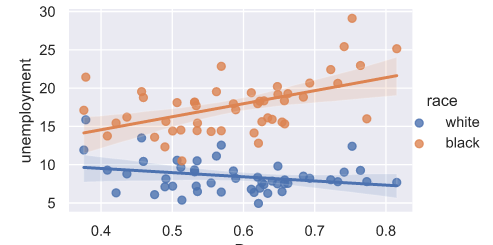

Not only is Black male unemployment higher in more segregated areas, but White male unemployment is lower. Black male unemployment may be higher due to "spatial mismatch", or not living near job opportunities. But why would White unemployment be lower? More research is necessary to find out, but it seems clear that segregation puts Black job-seekers at a disadvantage compared with Whites.

## ***Tract Demographics in a Segregated City***

The first few rows of the `tracts_cook` DataFrame appear in the console. 



```
      state county   tract  black_1990  black_2010  totalpop_1990  totalpop_2010
21098    17    031  010100        3050        2390           6409           4854
21099    17    031  010201        2658        2291           6524           6450
21100    17    031  010202         520         935           2657           2818
21101    17    031  010300        1618        1691           6835           6236
21102    17    031  010400         734         707           5670           5042
...     ...    ...     ...         ...         ...            ...            ...
22409    17    031  843500        3676        7555           6640          11309
22410    17    031  843600        3135        2639           3156           2807
22411    17    031  843700          77          93           2116           2117
22412    17    031  843800        2007        1104           3032           2110
22413    17    031  843900        4048        3246           4156           3533

[1314 rows x 7 columns]
```
In this exercise, you will calculate the percent African-American in two time periods, examine the histogram of this variable for 2010, and then plot them against each other to see how they have changed. You will observe that tracts with a mix of Black and other races are more likely to increase their percentage of black residents over time.

`pandas` and `seaborn` are loaded using the usual aliases.

* Calculate the percent African-American of each tract in 2010 as `100` times the Black population in that year divided by the total population in that year

* Call **`sns.distplot`** on the new `pct_black_2010` column of the `tracts_cook` DataFrame; make sure to set **`kde`** to `False`

In [ ]:
# Calculate percent Black in 2010
tracts_cook["pct_black_2010"] = 100 * tracts_cook['black_2010'] / tracts_cook['totalpop_2010']

# Examine histogram of percent Black
sns.distplot(tracts_cook["pct_black_2010"], kde=False)
plt.show()

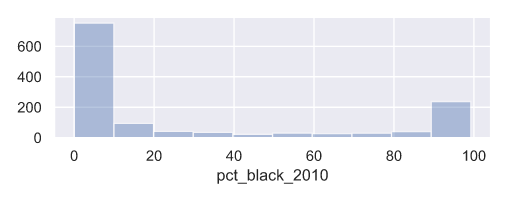

The big gap in the middle of the histogram shows that, in heavily segregated areas like Cook County, very few Census tracts have a mix of Blacks and other races.

## ***Segregation Begets More Segregation***

You have seen that there are relatively few tracts in Chicago with a mix of African-American and other races. How do these tracts evolve over time? `tracts_cook` is loaded, and you have already calculated the percent African-American in 2010. You will begin by doing the same for 1990, then calculate the percentage point change by subtracting this from the 2010 value. You will then use **`regplot`** to plot this change against the initial (1990) value.

In order to interpret the plot, you will add a red reference line to represent "no change". **`regplot`** also allows you to add a LOWESS curve (using **`lowess=True`**) to indicate the local trend in the data.

`pandas` and `seaborn` are loaded using the usual aliases.

* Calculate the percent African-American of each tract in 1990
* Calculate the percentage point change in African-American, by subtracting the 1990 value from the 2010 value

* In order to focus on the racially mixed tracks, restrict `tracts_cook` to those tracts where `pct_black_1990` is between 30% and 70%

* Plot 1990-2000 change in Black percent (y-axis) vs percent Black in 1990 (x-axis); use **`lowess=True`** to add a smoothed trend curve

In [ ]:
# Calculate percent Black in 1990 and percentage point change from 1990 to 2000
tracts_cook["pct_black_1990"] = 100 * tracts_cook['black_1990'] / tracts_cook['totalpop_1990']
tracts_cook["pct_black_change"] = tracts_cook['pct_black_2010'] - tracts_cook['pct_black_1990']

# Retain tracts between 30% and 70% Black in 1990
tracts_mixed = tracts_cook[(tracts_cook['pct_black_1990'] >= 30) & (tracts_cook['pct_black_1990'] <= 70)]

# Plot change vs. percent Black in 1990, with "no change" reference line
sns.regplot(x='pct_black_1990', y='pct_black_change', lowess=True, data=tracts_mixed)
plt.plot([30, 70], [0, 0], linestyle = "--", color = "red")
plt.show()

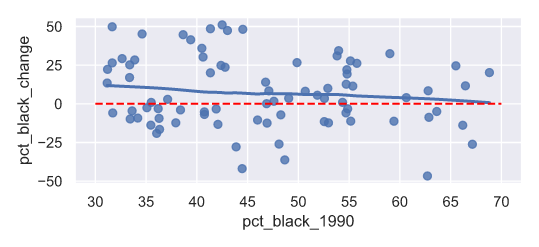

Notice that the LOWESS curve (blue line) is above red reference line ("no change") everywhere except the top end of the range. These tracts all increased their percentage Black between 1990 and 2010. It looks like mixed race areas, the ones between 30% and 70% Black in 1990, are likely to become more segregated (less mixed) over time, that is, there are more tracts that fall above this red reference line than below it. This is a common and troubling phenomenon.

## ***Population Decline in Segregated Neighborhoods***

While some urban areas have gentrified, other areas are being abandoned. Does the racial makeup of a neighborhood affect population change? In this exercise you will plot population gain or loss between 1990 and 2010 (in percentage terms) against the percent African-American of each tract in 1990.

When you examine the histogram of percent population change, you will notice that a small number of tracts have increased by 200%, 500%, 1000% or more! These are generally new developments in very low populations tracts, and will make interpreting our next plot difficult, so you will filter them out before proceeding.

`tracts_cook` is still loaded for you. `pandas` and `seaborn` are loaded using the usual aliases.

```
      state county   tract  black_1990  black_2010  totalpop_1990  totalpop_2010  pct_black_1990  pct_black_2010  pct_black_change
21098    17    031  010100        3050        2390           6409           4854          47.589          49.238             1.648
21099    17    031  010201        2658        2291           6524           6450          40.742          35.519            -5.222
21100    17    031  010202         520         935           2657           2818          19.571          33.180            13.609
21101    17    031  010300        1618        1691           6835           6236          23.672          27.117             3.444
21102    17    031  010400         734         707           5670           5042          12.945          14.022             1.077
...     ...    ...     ...         ...         ...            ...            ...             ...             ...               ...
22409    17    031  843500        3676        7555           6640          11309          55.361          66.805            11.444
22410    17    031  843600        3135        2639           3156           2807          99.335          94.015            -5.320
22411    17    031  843700          77          93           2116           2117           3.639           4.393             0.754
22412    17    031  843800        2007        1104           3032           2110          66.194          52.322           -13.872
22413    17    031  843900        4048        3246           4156           3533          97.401          91.877            -5.525

[1314 rows x 10 columns]
```

* Calculate the percent population change from 1990 to 2010 as 100 times the population difference divided by the base year (1990) population

* Call **`sns.distplot`** on the new `pct_pop_change` column; make sure to set **`kde`** to `False`.

* Filter `tracts_cook` to return only those counties where population growth is less than or equal to +100%, and assign to `tracts_change`

* Show a `scatterplot` of population change (on the y-axis) against percent Black in 1990 (on the x-axis)

In [ ]:
# Calculate percent population change 1990-2010
tracts_cook["pct_pop_change"] = 100 * (tracts_cook["totalpop_2010"] - tracts_cook["totalpop_1990"]) / tracts_cook["totalpop_1990"]

# Filter out very high growth census tracts
tracts_change = tracts_cook[tracts_cook['pct_pop_change'] <= 100]

# Plot population change vs. percent Black in 1990
sns.scatterplot(x='pct_black_1990', y='pct_pop_change', data=tracts_change)
plt.plot([0, 100], [0, 0], linestyle="--", color="red")
plt.show()

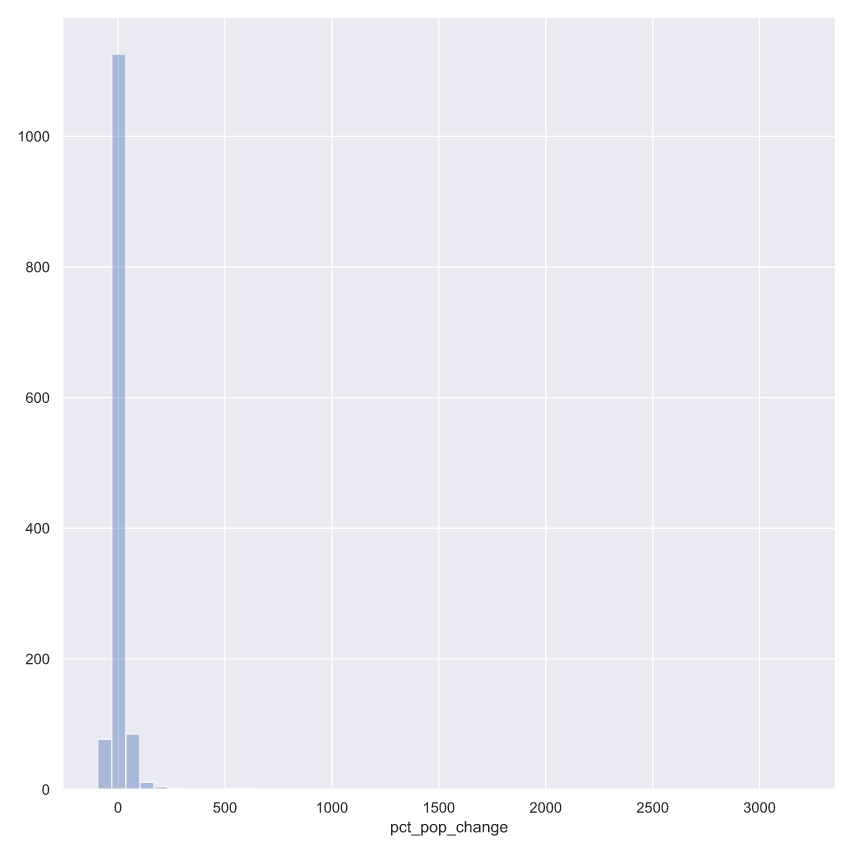

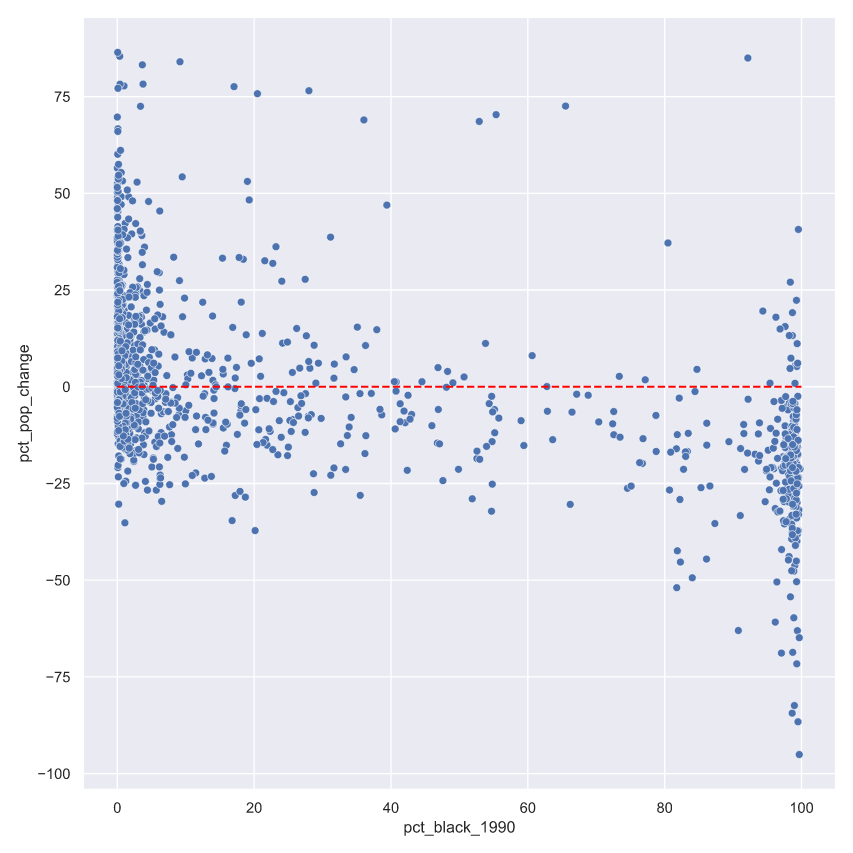

Notice again that there are relatively few census tracts in Cook County with a mix of African-Americans and other races. Moreover, notice that a large majority of heavily African-American tracts (the right side of the plot) lost population–in some cases nearly all of their population.



## ***Unemployment***

Unemployment varies by race and sex. In this exercise, you will start with a DataFrame, `unemp_by_race`, of percent unemployment by year for 25 to 54 year olds in four racial groups (White, Black, Asian, and Hispanic) and both sexes. You will create a bar plot of percent unemployment against year.

Because the *column names will, after melting, become labels* in your final plot, begin by providing column names that are shorter and clearer. The necessary code is provided at the beginning of the exercise.

`pandas` and `seaborn` have been imported with the usual aliases. `unemp_by_race` is loaded, and the dict you will use for renaming is displayed in the console.



```
   year  white_male  white_female  black_male  black_female  asian_male  asian_female  hispanic_male  hispanic_female
0  2011       7.712         7.099      16.647        13.994       6.302         6.982          9.353           11.426
0  2012       6.845         6.377      15.291        13.446       5.528         6.448          8.063           10.752
0  2013       6.166         5.745      14.032        12.105       4.990         5.816          6.915            9.525
0  2014       5.228         4.909      12.388        10.419       4.217         4.896          5.724            8.286
0  2015       4.570         4.323      10.533         9.167       3.992         4.747          5.040            7.070
0  2016       4.173         3.941       9.190         8.145       3.507         4.181          4.568            6.522
0  2017       3.816         3.543       8.776         7.626       3.058         3.948          4.185            5.707
```



* **`melt`** the `unemp_by_race` DataFrame; set **`id_vars`** to `"year"`, and remove the **`value_vars`** parameter to use ***all*** remaining columns as value columns

* Create a bar plot of `unemp_by_race`, with the year on the x-axis and the percent unemployed on the y-axis, with **`hue`** determined the demographic group

In [ ]:
# Rename columns
unemp_by_race.rename(columns=col_rename, inplace = True)

# Melt DataFrame by demographic group
unemp_by_race = unemp_by_race.melt(id_vars='year',
    var_name="demographic", value_name="pct_unemployed")

# Plot unemployment by group by year
sns.barplot(x='year', y='pct_unemployed', hue='demographic', data=unemp_by_race)
plt.show()

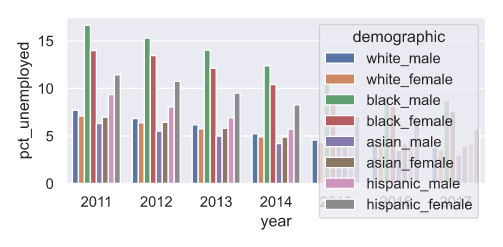

Notice that unemployment declined for all demographic groups over this period. Some patterns emerge. For example, unemployment is lower for females than males among Whites and Blacks, but higher among Asians and Hispanics. What other patterns do you see?

# ***Labor Force Participation***

Unemployment could be going down because labor force participation is decreasing, that is, fewer people are looking for work! In this exercise, you will investigate that possiblity. You will start with a DataFrame, `lf_by_race`, of percent labor force participation by year for 25 to 54 year olds in four racial groups (White, Black, Asian, and Hispanic) and both sexes. You will create a bar plot of labor force participation against year. In order to condition the bar plot by demographic group, you will first **`melt`** the DataFrame. The DataFrame already has suitable column names.

```
   year  white_male  white_female  black_male  black_female  asian_male  asian_female  hispanic_male  hispanic_female
0  2011      88.886        77.738      75.414        79.180      90.670        73.476         88.309           69.989
0  2012      88.784        77.842      75.621        79.017      90.527        72.785         88.618           70.256
0  2013      88.359        77.471      75.774        79.211      90.553        72.857         88.651           70.101
0  2014      88.415        77.340      76.031        79.108      90.046        72.759         88.617           69.853
0  2015      88.272        77.438      76.227        79.561      90.355        72.570         88.495           70.154
0  2016      88.309        77.985      76.805        79.931      90.225        73.056         88.660           70.552
0  2017      88.532        78.421      77.298        80.506      90.532        73.219         88.699           71.079
```

`pandas` and `seaborn` have been imported with the usual aliases. `unemp_by_race` is loaded and five columns are displayed in the console.

* **`melt`** the `lf_by_race` DataFrame, setting **`var_name`** to `"demographic"` and **`value_name`** to `"labor_force_participation"`; can you determine the appropriate column for the **`id_vars`** parameter?

* Call **`sns.barplot`** with the year on the x-axis and labor force participation on the y-axis; then use the **`hue`** parameter to show sex grouped by year.

In [ ]:
# Melt DataFrame by demographic group
lf_by_race = lf_by_race.melt(
        id_vars='year',
        var_name='demographic',
        value_name='labor_force_participation'
		)

# Plot labor force particpation by group by year
sns.barplot(x='year', y='labor_force_participation', hue='demographic', data=lf_by_race)
plt.show()

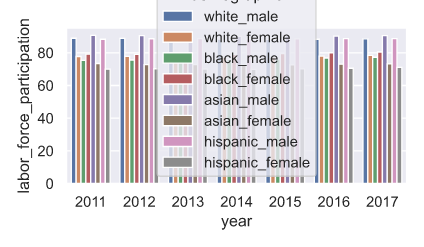

Labor force participation looks like it has been pretty stable in the recent past, although there is substantial variation by race and sex.

## ***Heatmap of Travel Times By Commute Mode***

In this exercise, you will create a **`heatmap`** of national data comparing commute times (in minutes) and travel modes. You begin with `data_row`, 

```
['13980768', '16037855', '18274861', '17434684', '7700140', '15674998', 7752722', '8729147', '7879590', '1522893', '1795947', '2032266', '1907121', '804478', '1954367', '925529', '1199365', '1446986', '92838', '172706', '324349', '546829', '272552', '1191000', '784025', '1341213', '2882395', '1857465', '801533', '560313', '343526', '98665', '211157', '58071', '56880',
 '61727', '467760', '433294', '441519', '353622', '122844', '314446', '113914', '137789', '308483']
```
a list of values from the single data row of a JSON API response object. Lists of travel `modes`(5) and commute `times` (9) have been created, and are printed to the console. You must reshape the single data row into a list of lists, construct a DataFrame suitable to pass to **`sns.heatmap`**, and create the heatmap.

The data row contains data on the 5 travel modes in groups of 9 commute times. An iteration is a complete set of commute times.

`pandas` and `seaborn` are loaded using the usual aliases.

* Set `iter_len` to the length of the `times` list

```
['under_10_min',  '10_min', '15_min', '20_min', '25_min', '30_min', '35_min', '45_min', '60_plus_min']
```

* In the list comprehension, construct a range with a start of `0`, stop of the length of the `data_row`, and step of `iter_len`

* Construct a heatmap with the `commuting` DataFrame

```
                under_10_min    10_min    15_min    20_min   25_min    30_min   35_min   45_min  60_plus_min
drove_alone         13980768  16037855  18274861  17434684  7700140  15674998  7752722  8729147      7879590
carpooled            1522893   1795947   2032266   1907121   804478   1954367   925529  1199365      1446986
public_transit         92838    172706    324349    546829   272552   1191000   784025  1341213      2882395
walked               1857465    801533    560313    343526    98665    211157    58071    56880        61727
other                 467760    433294    441519    353622   122844    314446   113914   137789       308483
```
 as the first parameter; annotate the heatmap with the commute count in thousands (use integer division to divide by `1000`)


In [1]:
# Set iter_len to the number of commute times
iter_len = len(times)

# Break row into list of lists by travel mode
data = [data_row[i:i+iter_len] for i in range(0, len(data_row), iter_len)]

# Create DataFrame, set data type to int
commuting = pd.DataFrame(data=data, index=modes, columns=times)
commuting = commuting.astype(int)

# Create heatmap of commuters by mode by income
sns.heatmap(commuting, annot=commuting // 1000, fmt="d", cmap="YlGnBu")
plt.xticks(rotation = 50)
plt.yticks(rotation = 50)
plt.show()

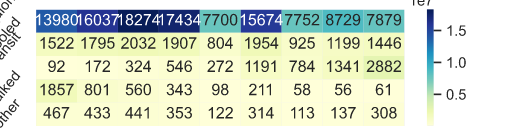

Notice that the vast majority of commuting takes place by car. This is quite different from what we saw for Manhattan in the lesson video, where most commuting is by public transit!

## ***Worker Population***

In this exercise you will create a map comparing worker and residential population densities in the New York Metropolitan Area. You will use **`geopandas`**. The New York metro area county geometries are in the geopandas DataFrame `geo_nyma`, which is displayed in the plot window.

```
    geoid state county         name                                           geometry
0   34003    34    003       Bergen  MULTIPOLYGON (((561319.509 4541348.091, 562979...
1   34013    34    013        Essex  MULTIPOLYGON (((552647.404 4512607.614, 552845...
2   34019    34    019    Hunterdon  MULTIPOLYGON (((483486.812 4492118.549, 483526...
3   36119    36    119  Westchester  MULTIPOLYGON (((603392.373 4526671.405, 603429...
4   34025    34    025     Monmouth  MULTIPOLYGON (((532812.022 4448071.476, 534081...
5   34029    34    029        Ocean  MULTIPOLYGON (((538102.820 4436635.609, 539771...
6   34035    34    035     Somerset  MULTIPOLYGON (((517296.871 4484970.056, 517873...
7   36071    36    071       Orange  MULTIPOLYGON (((519840.639 4588687.779, 519937...
8   34027    34    027       Morris  MULTIPOLYGON (((509345.259 4515321.520, 509774...
9   36059    36    059       Nassau  MULTIPOLYGON (((627067.936 4530913.802, 627189...
10  36079    36    079       Putnam  MULTIPOLYGON (((585245.968 4575302.480, 585358...
11  34037    34    037       Sussex  MULTIPOLYGON (((500695.556 4549001.577, 501493...
12  36027    36    027     Dutchess  MULTIPOLYGON (((583522.513 4590267.930, 583602...
13  34039    34    039        Union  MULTIPOLYGON (((545698.675 4494498.653, 545908...
14  36005    36    005        Bronx  MULTIPOLYGON (((603382.205 4523878.794, 603459...
15  34017    34    017       Hudson  MULTIPOLYGON (((570409.129 4511125.340, 570449...
16  36087    36    087     Rockland  MULTIPOLYGON (((565748.437 4556391.555, 566166...
17  36085    36    085     Richmond  MULTIPOLYGON (((570878.367 4499783.135, 570971...
18  34023    34    023    Middlesex  MULTIPOLYGON (((531405.109 4465907.696, 531384...
19  36081    36    081       Queens  MULTIPOLYGON (((587589.171 4510305.416, 587688...
20  36047    36    047        Kings  MULTIPOLYGON (((581022.506 4497687.253, 581024...
21  36103    36    103      Suffolk  MULTIPOLYGON (((748278.386 4570727.646, 748413...
22  36061    36    061     New York  MULTIPOLYGON (((584524.516 4505972.875, 584694...
23  34031    34    031      Passaic  MULTIPOLYGON (((541726.431 4548408.735, 543459...
24  42103    42    103         Pike  MULTIPOLYGON (((470199.541 4565585.756, 470631...
```

 The additional demographic info is loaded in the DataFrame `nyma_counties`.

```
    worker_pop  residential_pop state county
0       381671          1455846    36    005
1        27653            99464    36    079
2       736499          2339280    36    081
3       872152          2635121    36    047
4      2560247          1653877    36    061
5       119911           325027    36    087
6       446496           975321    36    119
7       578774          1363069    36    059
8       130913           475948    36    085
9       118731           295685    36    027
10      644721          1497595    36    103
11      147888           378174    36    071
12      268593           627551    34    025
13       44694           143570    34    037
14      189427           333316    34    035
15      373120           800401    34    013
16      179900           589699    34    029
17      388513           837288    34    023
18      186760           510563    34    031
19      433652           937920    34    003
20      241148           557320    34    039
21      287686           679756    34    017
22       55177           125717    34    019
23      295348           498847    34    027
24       13414            55687    42    103
```
`pandas` and `geopandas` are loaded using the usual aliases.

* Merge `geo_nyma` with `nyma_counties` on columns `state` and `county`

* Calculate worker and residential densities in square kilometers as `1000**2` times the worker and residential populations, divided by `geo_nyma.area`

* Plot the residential density by setting the **`column`** parameter to the appropriate column 

* Do the same for worker density

In [ ]:
# Merge population data with geopandas DataFrame
geo_nyma = pd.merge(geo_nyma, nyma_counties, on=['state', 'county'])

# Calculate population densities
geo_nyma["worker_density"] = (1000**2) * geo_nyma['worker_pop'] / geo_nyma.area
geo_nyma["residential_density"] = (1000**2) * geo_nyma['residential_pop'] / geo_nyma.area

# Compare residential and worker density plots
fig, axes = plt.subplots(ncols=2)
geo_nyma.plot(column='residential_density', cmap="YlGnBu", ax=axes[0])
geo_nyma.plot(column='worker_density', cmap="YlGnBu", ax=axes[1])
plt.show()

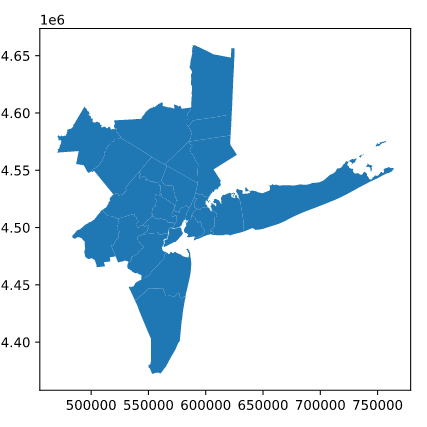

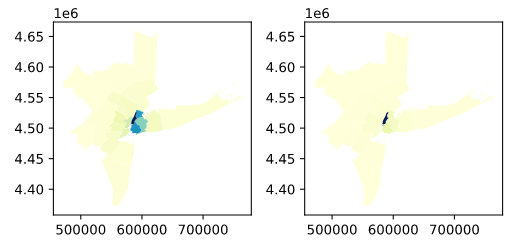

As you can see, residential population is concentrated in the core of the metropolitan area, but worker population is even more highly concentrated.

## ***Immigration***

While immigrants from foreign countries may stay for many years, we may be interested in new immigration, and how immigration is changing over time. In this exercise, you will use data from ACS Table B07410, which allows you to look specifically at movers who arrive from abroad and are not citizens –i.e. new immigrants.

The DataFrame `us_immigration` is loaded, and is displayed in the console. It shows `new_immigrants` and the total population by year, 2011-2017.

```
       total  new_immigrant  year
0  307900319        1069683  2011
0  310212755        1058441  2012
0  312432820        1135684  2013
0  315095393        1250013  2014
0  317635720        1308785  2015
0  319361956        1387688  2016
0  321994428        1343781  2017
```

`pandas` and `seaborn` are imported using the usual aliases.

* Calculate the percent of the population that are new immigrants, using the columns `new_immigrant` and `total`
* Create a barplot of the percent of population that are new immigrants by `year`

In [ ]:
# Calculate new immigrants as percent of current population
us_immigration["pct_new_immigrant"] = 100 * us_immigration['new_immigrant'] / us_immigration['total']

# Create a barplot
sns.barplot(x='year', y='pct_new_immigrant', data=us_immigration, color="cornflowerblue")
plt.show()

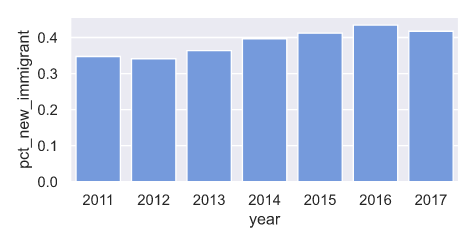

Notice that numbers in the y-axis are not a mistake! In any given year, the flow of new immigrants amounts to less than one-half of one percent of the population. Of course, the percent of immigrants currently resident in the United States is much higher. This plot lets us see recent changes in the flow. There were slight increases from 2012-2016, and a slight decline in 2017.

## ***State-to-State Flows***

In the video, you saw a heatmap of state-to-state migration flows, but it was cluttered. In this exercise, you will look only at flows within the Midwest.

A DataFrame `state_to_state` has been loaded, and the first few rows are displayed in the console. 

```
:

                       Alabama  Alaska  Arizona  Arkansas  California  ...  Washington  West Virginia  Wisconsin  Wyoming  Puerto Rico
Alabama                    NaN   576.0   1022.0     495.0      6611.0  ...       677.0           42.0      874.0    539.0        335.0
Alaska                   423.0     NaN   1176.0      65.0      3593.0  ...      4888.0            0.0      260.0    291.0        848.0
Arizona                  894.0  1946.0      NaN    1205.0     64756.0  ...     13897.0         1419.0     6736.0    925.0       1462.0
Arkansas                2057.0   103.0    836.0       NaN      4026.0  ...      2257.0           75.0      539.0    178.0        857.0
California              3045.0  4206.0  33757.0    4282.0         NaN  ...     27973.0         1150.0     7354.0   2674.0       1102.0
Colorado                2328.0  1698.0  13015.0     808.0     26909.0  ...      4487.0          309.0     3243.0   3657.0        751.0
Connecticut             1102.0   331.0    309.0     960.0      3979.0  ...       631.0          286.0      237.0      0.0       3066.0
Delaware                 148.0    80.0     22.0       0.0       598.0  ...       181.0          158.0        0.0      0.0        666.0
District of Columbia     140.0    77.0    744.0       0.0      3908.0  ...       418.0          296.0      242.0      0.0        351.0
Florida                11353.0  1852.0  10312.0    4136.0     28420.0  ...      6152.0         3979.0    11298.0    454.0      24132.0
Georgia                18276.0  1287.0   3901.0    2388.0     18948.0  ...      3270.0          838.0     1273.0     22.0       2626.0
Hawaii                  1182.0   672.0   1852.0     155.0     13047.0  ...      4355.0           20.0       54.0      0.0          0.0
Idaho                      0.0  1638.0   4322.0     341.0     17019.0  ...      9303.0          122.0      249.0   3030.0          0.0
Illinois                2022.0   578.0   5251.0    1288.0     15163.0  ...      3628.0          880.0    15595.0    271.0       1793.0
Indiana                 1133.0   495.0   1185.0    1308.0      6970.0  ...      1203.0          156.0     2460.0      0.0         34.0
Iowa                     395.0   662.0   1556.0     315.0      2380.0  ...      1662.0          203.0     3848.0    171.0         12.0
Kansas                   879.0   291.0   2664.0    1526.0      4526.0  ...      1885.0            0.0      125.0     79.0        308.0
Kentucky                2272.0   361.0   1177.0     756.0      6594.0  ...       313.0         2929.0     1313.0      0.0       2194.0
Louisiana               5658.0   359.0    857.0    1471.0      4654.0  ...      1516.0          586.0      714.0    162.0        186.0
Maine                    471.0     7.0    257.0       0.0      1315.0  ...       907.0          107.0      328.0      0.0          0.0
Maryland                1241.0    53.0    940.0     349.0      6348.0  ...      2176.0         4744.0      723.0      0.0       1214.0
Massachusetts            681.0   115.0   2511.0     388.0     12831.0  ...      1463.0          292.0     1484.0    166.0       4448.0
Michigan                2287.0   285.0   4061.0     806.0      8001.0  ...      1849.0          435.0     5058.0   1380.0       1030.0
Minnesota                115.0   334.0   4475.0     484.0      6232.0  ...      2666.0          331.0    18683.0    846.0         60.0
Mississippi             5125.0     0.0    544.0    3244.0      4317.0  ...      1989.0          260.0     1455.0      0.0        910.0
Missouri                2283.0  1288.0   2958.0    8523.0      7037.0  ...      2916.0          514.0     1828.0    540.0        684.0
Montana                  296.0   608.0   1416.0     340.0      5173.0  ...      5132.0          110.0      939.0   1434.0          0.0
Nebraska                 227.0   549.0   1264.0     568.0      3661.0  ...       812.0           45.0      223.0   1281.0          0.0
Nevada                   394.0   562.0   5741.0     534.0     45482.0  ...      4639.0           14.0      889.0   1686.0        399.0
New Hampshire            174.0   740.0    678.0       0.0       953.0  ...        11.0          297.0       84.0      0.0        202.0
New Jersey                48.0   299.0   1013.0     137.0      8239.0  ...       534.0          350.0      330.0      0.0       3694.0
New Mexico               732.0   749.0   7350.0     552.0      4939.0  ...      1843.0          153.0      332.0    198.0         92.0
New York                 402.0   421.0   4971.0     755.0     22626.0  ...      4929.0         1503.0     2787.0     83.0       7385.0
North Carolina          3491.0  2059.0   3539.0    1135.0     17653.0  ...      4751.0         3722.0     2600.0    145.0       1631.0
North Dakota             193.0   151.0    681.0     144.0      1797.0  ...       709.0          144.0      556.0    342.0       1049.0
Ohio                    3101.0   169.0   2620.0     873.0     11777.0  ...      3423.0         8726.0     1660.0    179.0       3059.0
Oklahoma                 176.0   328.0   1912.0    7396.0     11302.0  ...      1658.0          174.0      829.0    299.0        272.0
Oregon                   167.0   549.0   4932.0     921.0     43804.0  ...     24207.0          140.0      557.0    563.0          0.0
Pennsylvania            1978.0   820.0   2076.0     979.0     12381.0  ...      3772.0         3979.0     2337.0    188.0       7005.0
Rhode Island              53.0     0.0    360.0      91.0      1484.0  ...       399.0            0.0      325.0      0.0         40.0
South Carolina          2823.0   411.0   1708.0     581.0      4846.0  ...      1943.0         2403.0     1243.0    508.0        595.0
South Dakota               0.0   346.0    732.0      18.0      2929.0  ...       976.0          131.0     1026.0   2047.0          0.0
Tennessee               7683.0  1141.0   1449.0    5583.0      7996.0  ...      2187.0         1249.0     1309.0     25.0        667.0
Texas                   6915.0  2257.0  20322.0   11986.0     69945.0  ...     14335.0          915.0     4927.0    732.0       9246.0
Utah                     125.0  2350.0   9140.0    1136.0     23034.0  ...      5074.0           51.0      398.0    755.0         59.0
Vermont                    0.0     0.0    337.0       0.0      1018.0  ...       165.0           23.0       54.0      0.0          0.0
Virginia                2424.0  1624.0   3584.0     519.0     17473.0  ...      4925.0         6618.0     1877.0     48.0       2001.0
Washington              1465.0  5374.0  12801.0     823.0     51485.0  ...         NaN          319.0     1940.0    866.0        480.0
West Virginia            284.0    11.0     57.0     195.0      1095.0  ...       216.0            NaN        0.0      0.0        112.0
Wisconsin                966.0   738.0   3364.0    1397.0      6830.0  ...      1634.0          110.0        NaN    420.0       1619.0
Wyoming                  265.0   524.0    352.0      77.0      1586.0  ...      1426.0          169.0      687.0      NaN          0.0
Puerto Rico               49.0     0.0    188.0     109.0       200.0  ...       368.0            0.0      173.0      0.0          NaN

[52 rows x 52 columns]
```

Remember that the *row labels indicate the state moved to*, while the *column names indicate the state moved from*.

A list `midwest_states` has been defined with the names of the Midwestern states. 

```
['Illinois',  'Indiana', 'Michigan', 'Ohio', 'Wisconsin', 'Iowa', 'Kansas', 'Minnesota', 'Missouri', 'Nebraska', 'North Dakota', 'South Dakota']
```

 The DataFrame also uses state names for the column names and index, so you will use `midwest_states` to extract the columns and rows you want to use for this heatmap.

`pandas` and `seaborn` are imported using the usual aliases.

* Subset the DataFrame to return only those columns matching the list of state names, and only those rows whose indexes are in the list of state names.

* Subsetting may have reordered the columns and rows. Check whether `midwest.index` is equal to `midwest.columns`.

* Sort the DataFrame by row index (`axis=0`) and column name (`axis=1`). Use `inplace=True` in both cases.

* Create a heatmap of midwest. Apply a yellow-green-blue color ramp with `cmap="YlGnBu"`.

In [ ]:
# Retain only rows and columns of Midwest states
midwest = state_to_state[midwest_states][state_to_state.index.isin(midwest_states)]

# Are rows and columns still in the same order?
print(midwest.index==midwest.columns)

# Sort the rows (by index) and columns (by name)
midwest.sort_index(axis=0, inplace=True)
midwest.sort_index(axis=1, inplace=True)

# Create a heatmap of migration flows
sns.heatmap(midwest, cmap='YlGnBu')
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.show()

 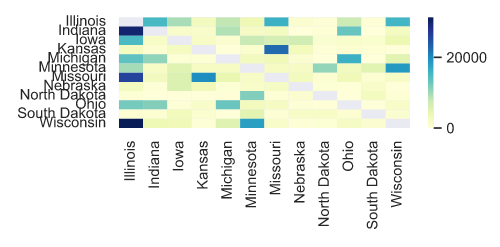


  Notice that to some extent, the image is a reflection around the diagonal. Look at Illinois and Indiana in the top left. Both cells are colored medium-to-dark. Two states will tend to have similar flows in both directions, due to social connections and return migration. More people are moving from Illinois to Indiana (that cell is dark blue), but the flow from Indiana to Illinois (medium blue) is still higher than for most other state pairs in the heatmap (which are mostly yellow).

## ***Rent Burden in San Francisco***

In this exercise, you will look at rent burden (households paying 30% or more of their income in rent) in San Francisco, one of the highest price housing markets in the country.

The `rent` DataFrame contains the number of households in each of 7 income categories crossed with 8 rent-share-of-income categories. 

```
      total  inc_under_10k  inc_under_10k_rent_under_20_pct  inc_under_10k_rent_20_to_25_pct  inc_under_10k_rent_25_to_30_pct  ...  inc_over_100k_rent_35_to_40_pct  inc_over_100k_rent_40_to_50_pct  \
0  42835169        5558843                            57052                            58042                           208806  ...                            32767                            19718   
0    225466          19278                              425                               50                              370  ...                             1276                              846   

   inc_over_100k_rent_over_50_pct  inc_over_100k_rent_not_computed           name  
0                            1073                           158519  United States  
0                              15                             1243  San Francisco  

[2 rows x 65 columns]
```

For each income category, You will use a loop to calculate the percentage of rent burdened households in each income category. The column name prefixes associated with each income category are in a list:

```
incomes = ["inc_under_10k", "inc_10k_to_20k", "inc_20k_to_35k", inc_35k_to_50k", "inc_50k_to_75k", "inc_75k_to_100k", "inc_over_100k"]
```
`pandas` and `seaborn` are imported using the usual aliases.

* Add the columns that count rent burdened households; these column names begin with income and end with `"_rent_30_to_35_pct"`, `"_rent_35_to_40_pct"`, `"_rent_40_to_50_pct"`, and `"_rent_over_50_pct"`.

In [ ]:
# Calculate percentage of rent burdened households
rent_burden = rent[["name"]]
for income in incomes:
    rent_burden[income] = 100 * (rent[income + "_rent_30_to_35_pct"] + 
        rent[income + "_rent_35_to_40_pct"] + rent[income + "_rent_40_to_50_pct"] + 
        rent[income + "_rent_over_50_pct"]) / (rent[income] - rent[income + "_rent_not_computed"])



```
            name  inc_under_10k  inc_10k_to_20k  inc_20k_to_35k  inc_35k_to_50k  inc_50k_to_75k  inc_75k_to_100k  inc_over_100k
0  United States         92.169          87.008          74.745          43.043          21.094            9.119          3.149
0  San Francisco         93.800          76.024          81.176          65.770          51.522           31.451          6.563
```
* Melt the DataFrame. The ID column (**`id_vars`**) to melt on is `name`. Use `"income"` for variable name (**`var_name`**), and `"percent_rent_burdened"` for the value name (**`value_name`**).

* Create a barplot of the percent of rent burdened households (y-axis) by income (x-axis). Use the `hue` parameter to condition the plot on the name of the geographic area. Don't forget the `data` parameter!




```
             name           income  percent_rent_burdened
0   United States    inc_under_10k                 92.169
1   San Francisco    inc_under_10k                 93.800
2   United States   inc_10k_to_20k                 87.008
3   San Francisco   inc_10k_to_20k                 76.024
4   United States   inc_20k_to_35k                 74.745
5   San Francisco   inc_20k_to_35k                 81.176
6   United States   inc_35k_to_50k                 43.043
7   San Francisco   inc_35k_to_50k                 65.770
8   United States   inc_50k_to_75k                 21.094
9   San Francisco   inc_50k_to_75k                 51.522
10  United States  inc_75k_to_100k                  9.119
11  San Francisco  inc_75k_to_100k                 31.451
12  United States    inc_over_100k                  3.149
13  San Francisco    inc_over_100k                  6.563
```
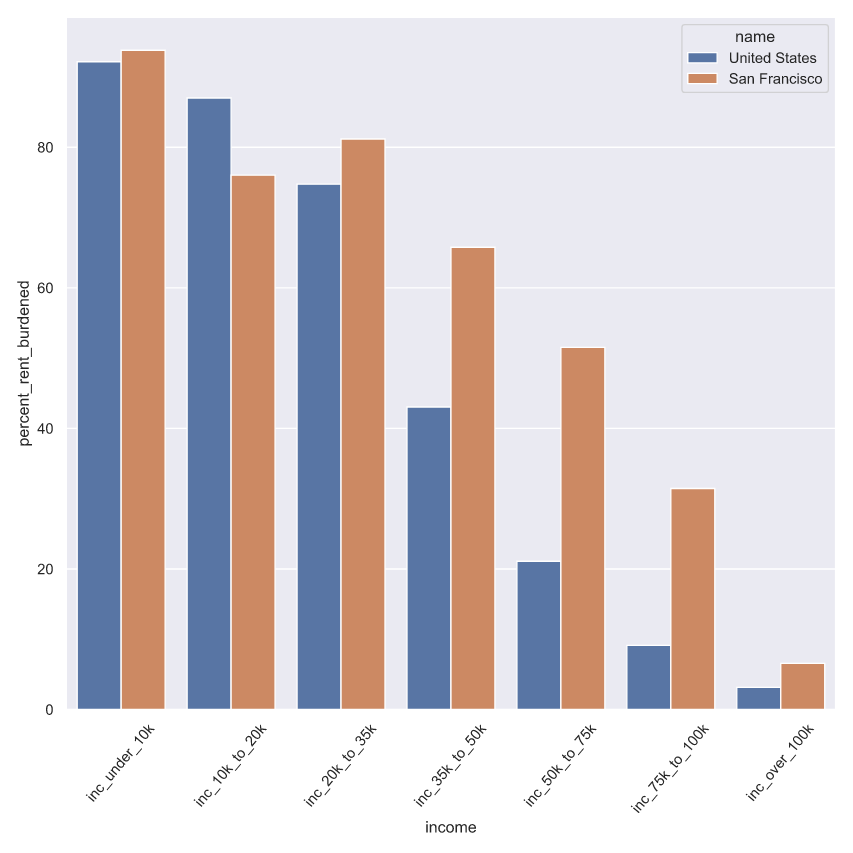

San Francisco is one of the highest price housing markets in the United States. Rent burden among very low income households is comparable to national averages, but many more middle-income households are rent burdened. In the $75,000 to $100,000 income category 31% of households in San Francisco are rent burdened vs. 9% nationally!

## ***High Rent and Rent Burden***

Rents can be very high in places like San Francisco, but to understand the geography of rent burden, looking at gross rents may not be as useful as looking at the share of income spent on rent.

In this exercise, you will join a DataFrame with gross rents in dollars (`median_rent`) and as a percentage of income (`median_rent_pct_of_income`) by Census tract in San Francisco with a **`geopandas`** DataFrame of those tracts. You will then map and compare these two variables. Darker colors in the maps indicate higher values (higher rents, or higher rent share of income).

The first few rows of these two columns are displayed in the console.

`pandas` and `geopandas` are imported using the usual aliases.

* **`merge`** `sf_rent` with the `sf_tracts` geopandas DataFrame, matching on the `state`, `county` and `tract` columns.

```
     median_rent  median_rent_pct_of_income state county   tract
0         1653.0                       29.1    06    075  010100
1         2249.0                       23.6    06    075  010200
2         1893.0                       22.6    06    075  010300
3         2229.0                       24.8    06    075  010400
4         2326.0                       24.7    06    075  010500
..           ...                        ...   ...    ...     ...
192          NaN                        NaN    06    075  980401
193        276.0                       27.4    06    075  980501
194       1013.0                       50.0    06    075  980600
195       2000.0                       32.0    06    075  980900
196          NaN                        NaN    06    075  990100

[197 rows x 5 columns]

    state county   tract                                           geometry
0      06    075  016500  MULTIPOLYGON (((6000586.137 2110999.663, 60006...
1      06    075  016300  MULTIPOLYGON (((6004890.436 2111600.490, 60049...
2      06    075  016100  MULTIPOLYGON (((6005653.391 2113095.487, 60057...
3      06    075  015900  MULTIPOLYGON (((6005507.500 2114139.367, 60055...
4      06    075  015700  MULTIPOLYGON (((6000257.805 2113355.568, 60002...
..    ...    ...     ...                                                ...
189    06    075  047901  MULTIPOLYGON (((5979282.874 2112038.630, 59793...
190    06    075  047902  MULTIPOLYGON (((5984063.874 2113147.427, 59840...
191    06    075  035400  MULTIPOLYGON (((5982910.578 2101517.560, 59829...
192    06    075  047701  MULTIPOLYGON (((5988428.480 2112605.119, 59884...
193    06    075  033100  MULTIPOLYGON (((5985145.860 2095865.492, 59852...

[194 rows x 4 columns]
```


* To map `median_rent` in San Francisco, use the **`notnull()`** method on the `median_rent` column to exclude a tract with missing data.

* Map the `median_rent_pct_of_income` column. Use the arrows in the plotting window to compare this map with the map of `median_rent`.

* Print the Pearson correlation between `median_rent` and `median_rent_pct_of_income`.


In [ ]:
# Merge geometries with rent data
sf_tracts = sf_tracts.merge(sf_rent, on=['state', 'county', 'tract'])

# Plot median rent by Census tract
sf_tracts[sf_tracts['median_rent'].notnull()].plot(column="median_rent", cmap="YlGnBu")
plt.show()
plt.close()

# Plot median rent as percentage of income
sf_tracts.plot('median_rent_pct_of_income', cmap="YlGnBu")
plt.show()

# Show correlation between median rent and percent of income
print(sf_tracts["median_rent"].corr(sf_tracts['median_rent_pct_of_income']))

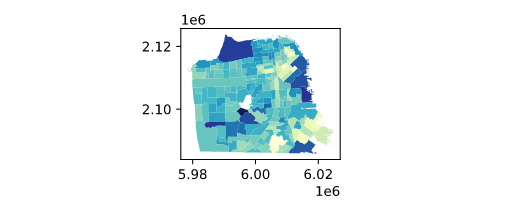

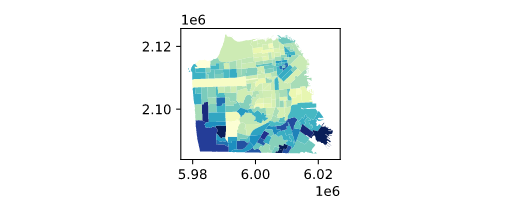

-0.3550607462910833

Neighborhoods with high rents will have high-income households, and as we've already seen, high-income households tend to spend a smaller share of their income on rent. This is consistent with the negative Pearson's correlation of -0.35, although even this is somewhat weak. Comparing the maps, you should be able to see some low rent neighborhoods with high rent share of income, and the converse.